# 1 라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import pickle
from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib
import random

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm
!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import auto_arima
import tensorflow as tf
from keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop, Adam
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import torch
import torch.nn as nn
import os
from tqdm import tqdm
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.1 MB/s eta 0:00:00


In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/busan/busan_weather.csv', encoding='euc-kr')

# 2 EDA

## 2.1 데이터 탐색

In [ ]:
# 데이터 속성 확인
df.shape

(11322, 5)

In [ ]:
# 데이터 샘플 확인(상위 5개)
df.head()

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  1993-01-01  159      6.1      2.4     11.9
1  1993-01-02  159      7.8      4.2     13.2
2  1993-01-03  159      8.2      4.9     12.3
3  1993-01-04  159      5.0      2.5      9.5
4  1993-01-05  159      4.8      0.0     11.1

In [ ]:
# 데이터 샘플 확인(하위 5개)
df.tail()

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
11317  2023-12-27  159      7.2      3.9     12.8
11318  2023-12-28  159      8.0      4.3     13.1
11319  2023-12-29  159      6.1      1.6     11.8
11320  2023-12-30  159      8.2      3.3     13.2
11321  2023-12-31  159      8.1      4.5     12.3

In [ ]:
# 결측치 확인
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    0
dtype: int64

In [ ]:
# 컬럼 형태(type) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11322 entries, 0 to 11321
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       11322 non-null  object 
 1   지점       11322 non-null  int64  
 2   평균기온(℃)  11322 non-null  float64
 3   최저기온(℃)  11321 non-null  float64
 4   최고기온(℃)  11322 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 442.4+ KB


In [ ]:
# 기초통계 확인(수치형)
df.describe()

지점       평균기온(℃)       최저기온(℃)       최고기온(℃)
count  11322.0  11322.000000  11321.000000  11322.000000
mean     159.0     15.093111     11.814062     19.313425
std        0.0      8.127928      8.688177      7.775054
min      159.0     -8.200000    -12.800000     -4.200000
25%      159.0      8.400000      4.800000     13.100000
50%      159.0     16.100000     12.600000     20.400000
75%      159.0     21.700000     19.100000     25.500000
max      159.0     31.700000     28.300000     37.300000

In [ ]:
# 기초통계 확인(범주형)
df.describe(include='object')

날짜
count        11322
unique       11322
top     1993-01-01
freq             1

## 2.2 시각화

### 2.2.1 heatmap

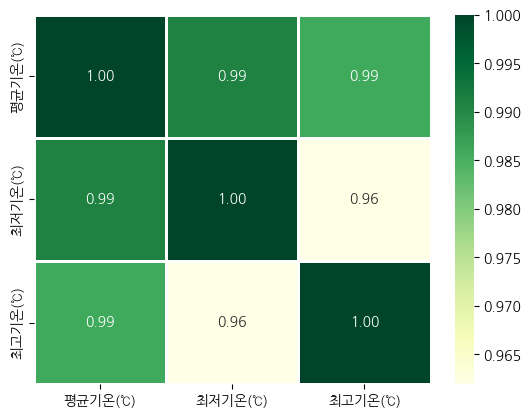

In [ ]:
df_corr = df.drop(['날짜', '지점'], axis=1)
sns.heatmap(df_corr.corr(), linecolor='white', linewidth=1, annot=True, fmt='.2f', cmap='YlGn')
plt.show()
# 평균기온은 최저, 최고기온과 매우 높은 상관관계를 가지고 있음
# 최저, 최고기온끼리의 상관관계도 매우 높음

### 2.2.2 pairplot

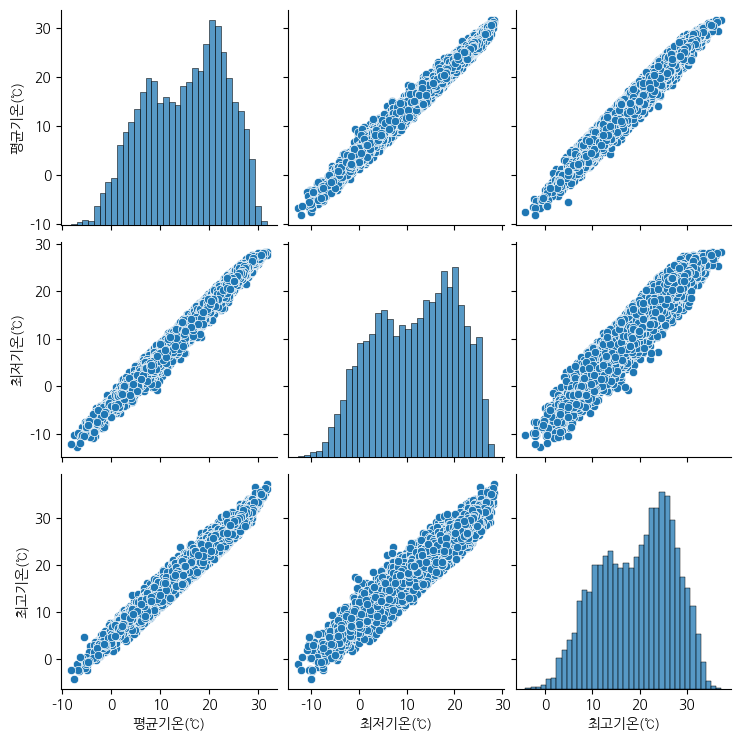

In [ ]:
sns.pairplot(df_corr)
plt.show()
# 전반적으로 양의 상관관계를 보이고 있음

### 2.2.3 날짜별 평균기온 시각화

In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])

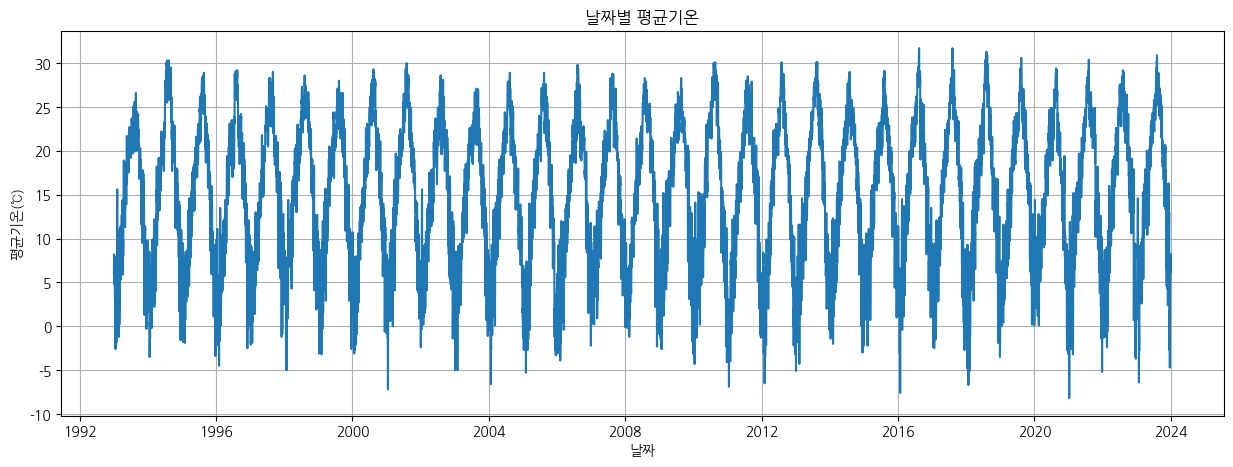

In [ ]:
daily_mean_temperature = df.groupby(df['날짜'].dt.date)['평균기온(℃)'].mean()

plt.figure(figsize=(15, 5))
plt.plot(daily_mean_temperature.index, daily_mean_temperature.values)
plt.title("날짜별 평균기온")
plt.xlabel("날짜")
plt.ylabel("평균기온(℃)")
plt.grid(True);

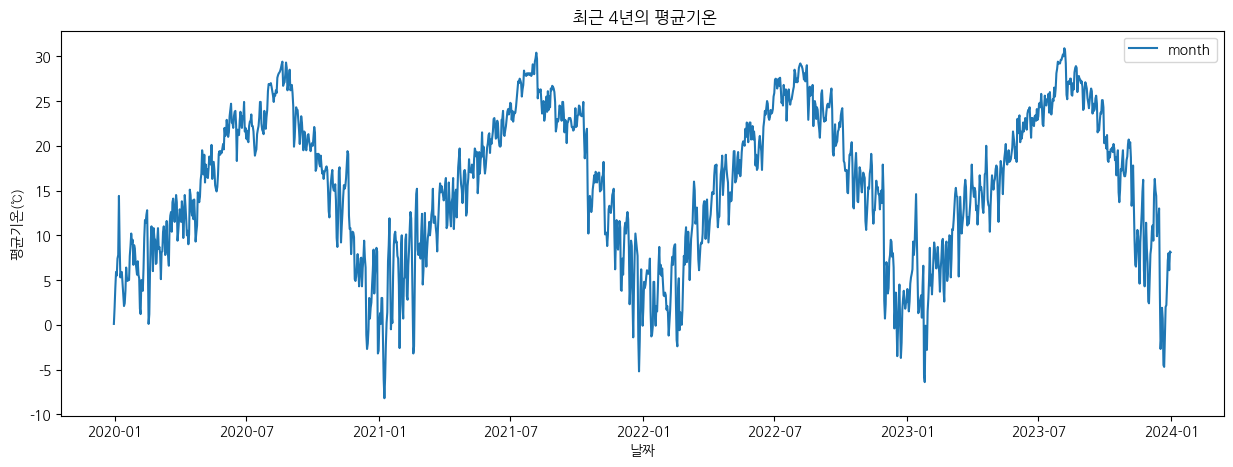

In [ ]:
plt.figure(figsize=(15,5))
daily_mean_temperature[9860:11322].plot(label="month") # 1년=365일 기준
plt.title(" 최근 4년의 평균기온")
plt.ylabel("평균기온(℃)")
plt.xlabel("날짜")
plt.legend();

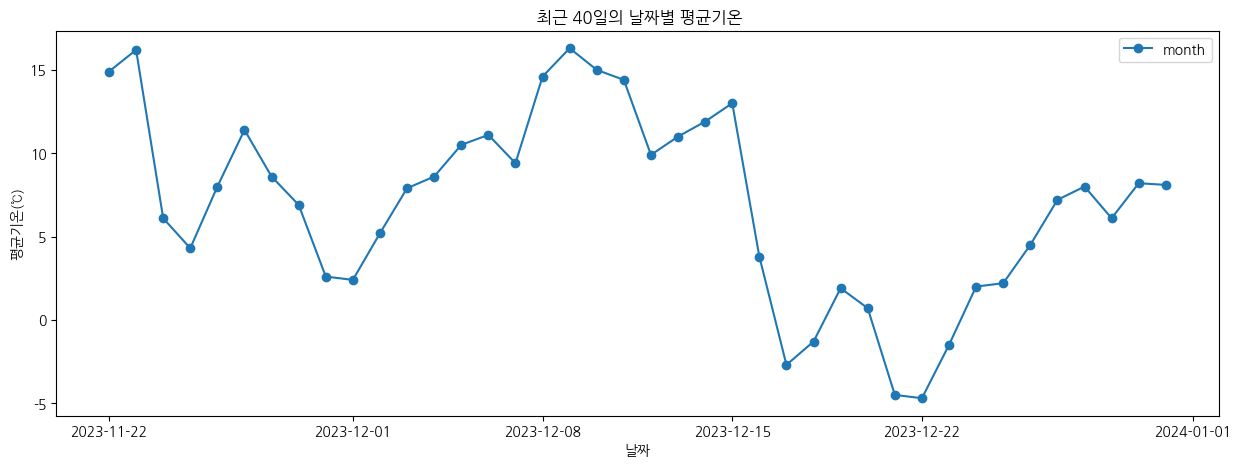

In [ ]:
plt.figure(figsize=(15,5))
daily_mean_temperature[11282:11322].plot(marker="o", label="month")
plt.title(" 최근 40일의 날짜별 평균기온")
plt.ylabel("평균기온(℃)")
plt.xlabel("날짜")
plt.legend();

### 2.2.4 scatterplot

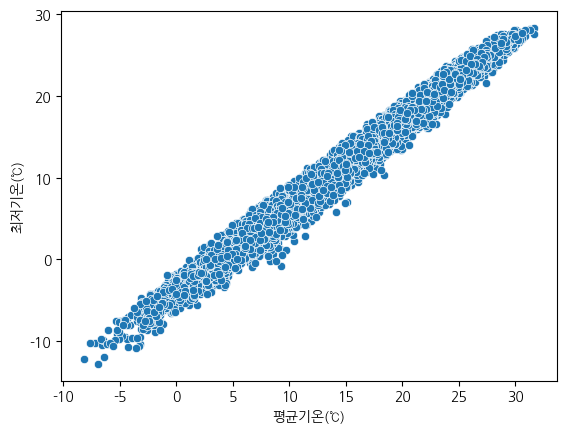

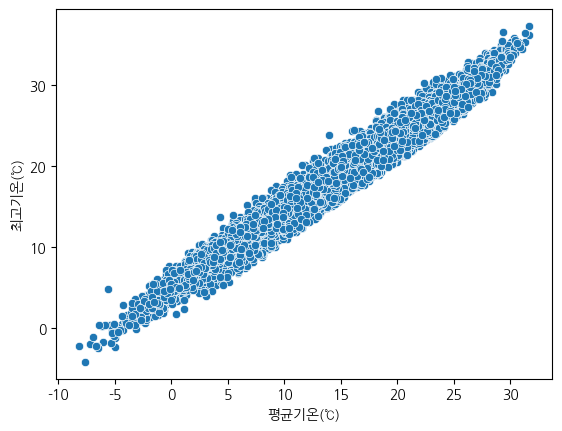

In [ ]:
col = ['최저기온(℃)', '최고기온(℃)']
for columns in col:
    sns.scatterplot(data=df, x='평균기온(℃)', y=f'{columns}')
    plt.show()

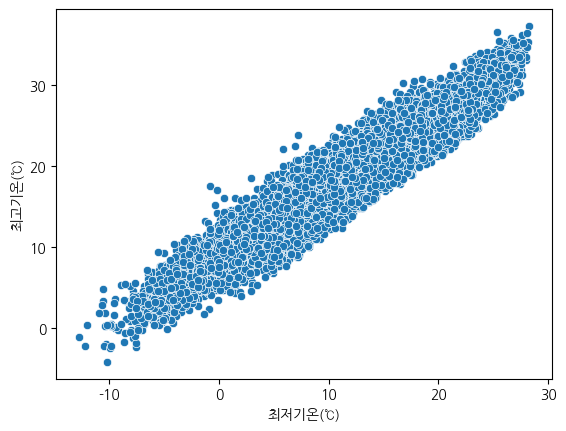

In [ ]:
sns.scatterplot(data=df, x='최저기온(℃)', y='최고기온(℃)')
plt.show()

### 2.2.5 violinplot

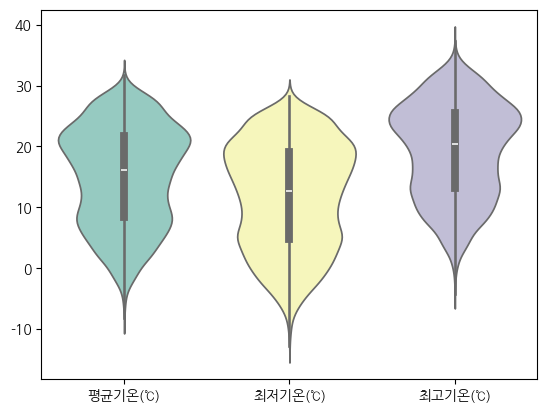

In [ ]:
dfv = df.drop(['지점', '날짜'], axis=1)
sns.violinplot(data=dfv, palette="Set3")
plt.show()

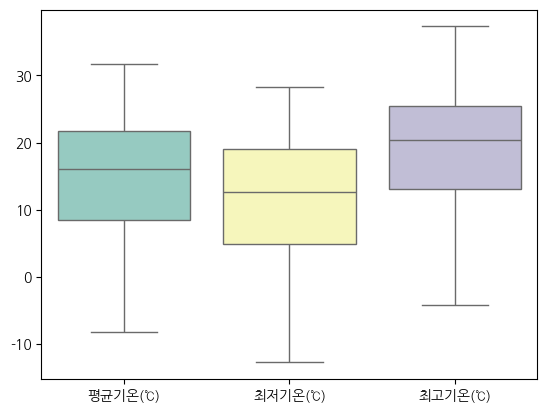

In [ ]:
df_outlier = df.drop(['지점', '날짜'], axis=1)
sns.boxplot(data=df_outlier, palette="Set3")
plt.show()

# 3 Preprocessing

## 3.1 추가 변수 데이터 생성

In [ ]:
df_humidity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/busan/busan_humidity.csv', encoding='euc-kr')
df_rain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/busan/busan_rain.csv', encoding='euc-kr')
df_sun = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/busan/busan_sun.csv', encoding='euc-kr')
df_wind = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/busan/busan_wind.csv', encoding='euc-kr')

In [ ]:
df_humidity.drop(['지점번호', '지점명', '일시'], axis=1, inplace=True)
df_rain.drop(['지점번호', '지점명', '일시'], axis=1, inplace=True)
df_sun.drop(['지점번호', '지점명', '일시'], axis=1, inplace=True)
df_wind.drop(['지점번호', '지점명', '일시'], axis=1, inplace=True)

In [ ]:
display(df.head(2))
display(df_humidity.head(2))
display(df_rain.head(2))
display(df_sun.head(2))
display(df_wind.head(2))

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0 1993-01-01  159      6.1      2.4     11.9
1 1993-01-02  159      7.8      4.2     13.2

평균습도(%rh)
0       29.8
1       34.5

강수량(mm)
0      NaN
1      NaN

일조합(hr)  일조율(%)  일사합(MJ/m2)
0      8.2    83.7       10.93
1      8.6    87.8       10.60

평균풍속(m/s)
0        5.0
1        3.5

In [ ]:
df = pd.concat([df, df_humidity, df_rain, df_sun, df_wind], axis=1)
df.head()

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)  평균습도(%rh)  강수량(mm)  일조합(hr)  \
0 1993-01-01  159      6.1      2.4     11.9       29.8      NaN      8.2   
1 1993-01-02  159      7.8      4.2     13.2       34.5      NaN      8.6   
2 1993-01-03  159      8.2      4.9     12.3       50.0      NaN      5.1   
3 1993-01-04  159      5.0      2.5      9.5       44.3      NaN      2.1   
4 1993-01-05  159      4.8      0.0     11.1       33.3      NaN      8.4   

   일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  
0    83.7       10.93        5.0  
1    87.8       10.60        3.5  
2    51.5        7.97        3.6  
3    21.2        6.15        3.9  
4    84.8       10.54        3.6

## 3.2 추가 변수 데이터 EDA

### 3.2.1 데이터 탐색

In [ ]:
# 데이터 속성 확인
df.shape

(11322, 11)

In [ ]:
# 데이터 샘플 확인(상위 5개)
df.head()

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)  평균습도(%rh)  강수량(mm)  일조합(hr)  \
0 1993-01-01  159      6.1      2.4     11.9       29.8      NaN      8.2   
1 1993-01-02  159      7.8      4.2     13.2       34.5      NaN      8.6   
2 1993-01-03  159      8.2      4.9     12.3       50.0      NaN      5.1   
3 1993-01-04  159      5.0      2.5      9.5       44.3      NaN      2.1   
4 1993-01-05  159      4.8      0.0     11.1       33.3      NaN      8.4   

   일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  
0    83.7       10.93        5.0  
1    87.8       10.60        3.5  
2    51.5        7.97        3.6  
3    21.2        6.15        3.9  
4    84.8       10.54        3.6

In [ ]:
# 데이터 샘플 확인(하위 5개)
df.tail()

날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)  평균습도(%rh)  강수량(mm)  일조합(hr)  \
11317 2023-12-27  159      7.2      3.9     12.8       50.4      NaN      7.7   
11318 2023-12-28  159      8.0      4.3     13.1       49.8      NaN      8.9   
11319 2023-12-29  159      6.1      1.6     11.8       47.5      NaN      8.9   
11320 2023-12-30  159      8.2      3.3     13.2       58.4      2.2      6.3   
11321 2023-12-31  159      8.1      4.5     12.3       67.1      0.0      5.4   

       일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  
11317    78.6       11.47        1.7  
11318    90.8       11.48        2.0  
11319    90.8       11.74        3.0  
11320    64.3       10.12        2.9  
11321    55.1        9.85        3.9

In [ ]:
# 결측치 확인
df.isnull().sum()

날짜               0
지점               0
평균기온(℃)          0
최저기온(℃)          1
최고기온(℃)          0
평균습도(%rh)        2
강수량(mm)       7554
일조합(hr)         14
일조율(%)           0
일사합(MJ/m2)      95
평균풍속(m/s)        5
dtype: int64

In [ ]:
# 컬럼 형태(type) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11322 entries, 0 to 11321
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          11322 non-null  datetime64[ns]
 1   지점          11322 non-null  int64         
 2   평균기온(℃)     11322 non-null  float64       
 3   최저기온(℃)     11321 non-null  float64       
 4   최고기온(℃)     11322 non-null  float64       
 5   평균습도(%rh)   11320 non-null  float64       
 6   강수량(mm)     3768 non-null   float64       
 7   일조합(hr)     11308 non-null  float64       
 8   일조율(%)      11322 non-null  float64       
 9   일사합(MJ/m2)  11227 non-null  float64       
 10  평균풍속(m/s)   11317 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 973.1 KB


In [ ]:
# 기초통계 확인(수치형)
df.describe()

날짜       지점       평균기온(℃)       최저기온(℃)       최고기온(℃)  \
count                11322  11322.0  11322.000000  11321.000000  11322.000000   
mean   2008-07-01 12:00:00    159.0     15.093111     11.814062     19.313425   
min    1993-01-01 00:00:00    159.0     -8.200000    -12.800000     -4.200000   
25%    2000-10-01 06:00:00    159.0      8.400000      4.800000     13.100000   
50%    2008-07-01 12:00:00    159.0     16.100000     12.600000     20.400000   
75%    2016-03-31 18:00:00    159.0     21.700000     19.100000     25.500000   
max    2023-12-31 00:00:00    159.0     31.700000     28.300000     37.300000   
std                    NaN      0.0      8.127928      8.688177      7.775054   

          평균습도(%rh)      강수량(mm)       일조합(hr)        일조율(%)    일사합(MJ/m2)  \
count  11320.000000  3768.000000  11308.000000  11322.000000  11227.000000   
mean      63.235989    12.955573      6.541537     54.752924     14.079322   
min       11.300000     0.000000      0.000000      0.000000      0.010000   
25%       48.800000     0.200000      2.900000     23.625000      9.140000   
50%       64.900000     2.500000      7.800000     65.000000     13.420000   
75%       78.100000    14.500000      9.700000     85.100000     19.480000   
max      100.000000   310.000000     13.500000     98.100000     31.660000   
std       18.489954    25.288694      3.992883     33.461735      7.007822   

          평균풍속(m/s)  
count  11317.000000  
mean       3.377644  
min        0.300000  
25%        2.500000  
50%        3.200000  
75%        4.000000  
max       11.700000  
std        1.285125

### 3.2.2 시각화

#### 3.2.2.1 heatmap

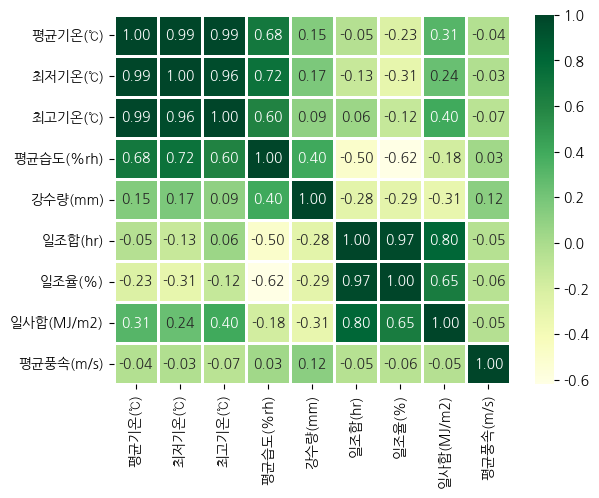

In [ ]:
df_corr = df.drop(['날짜', '지점'], axis=1)
sns.heatmap(df_corr.corr(), linecolor='white', linewidth=1, annot=True, fmt='.2f', cmap='YlGn')
plt.show()

#### 3.2.2.2 pairplot

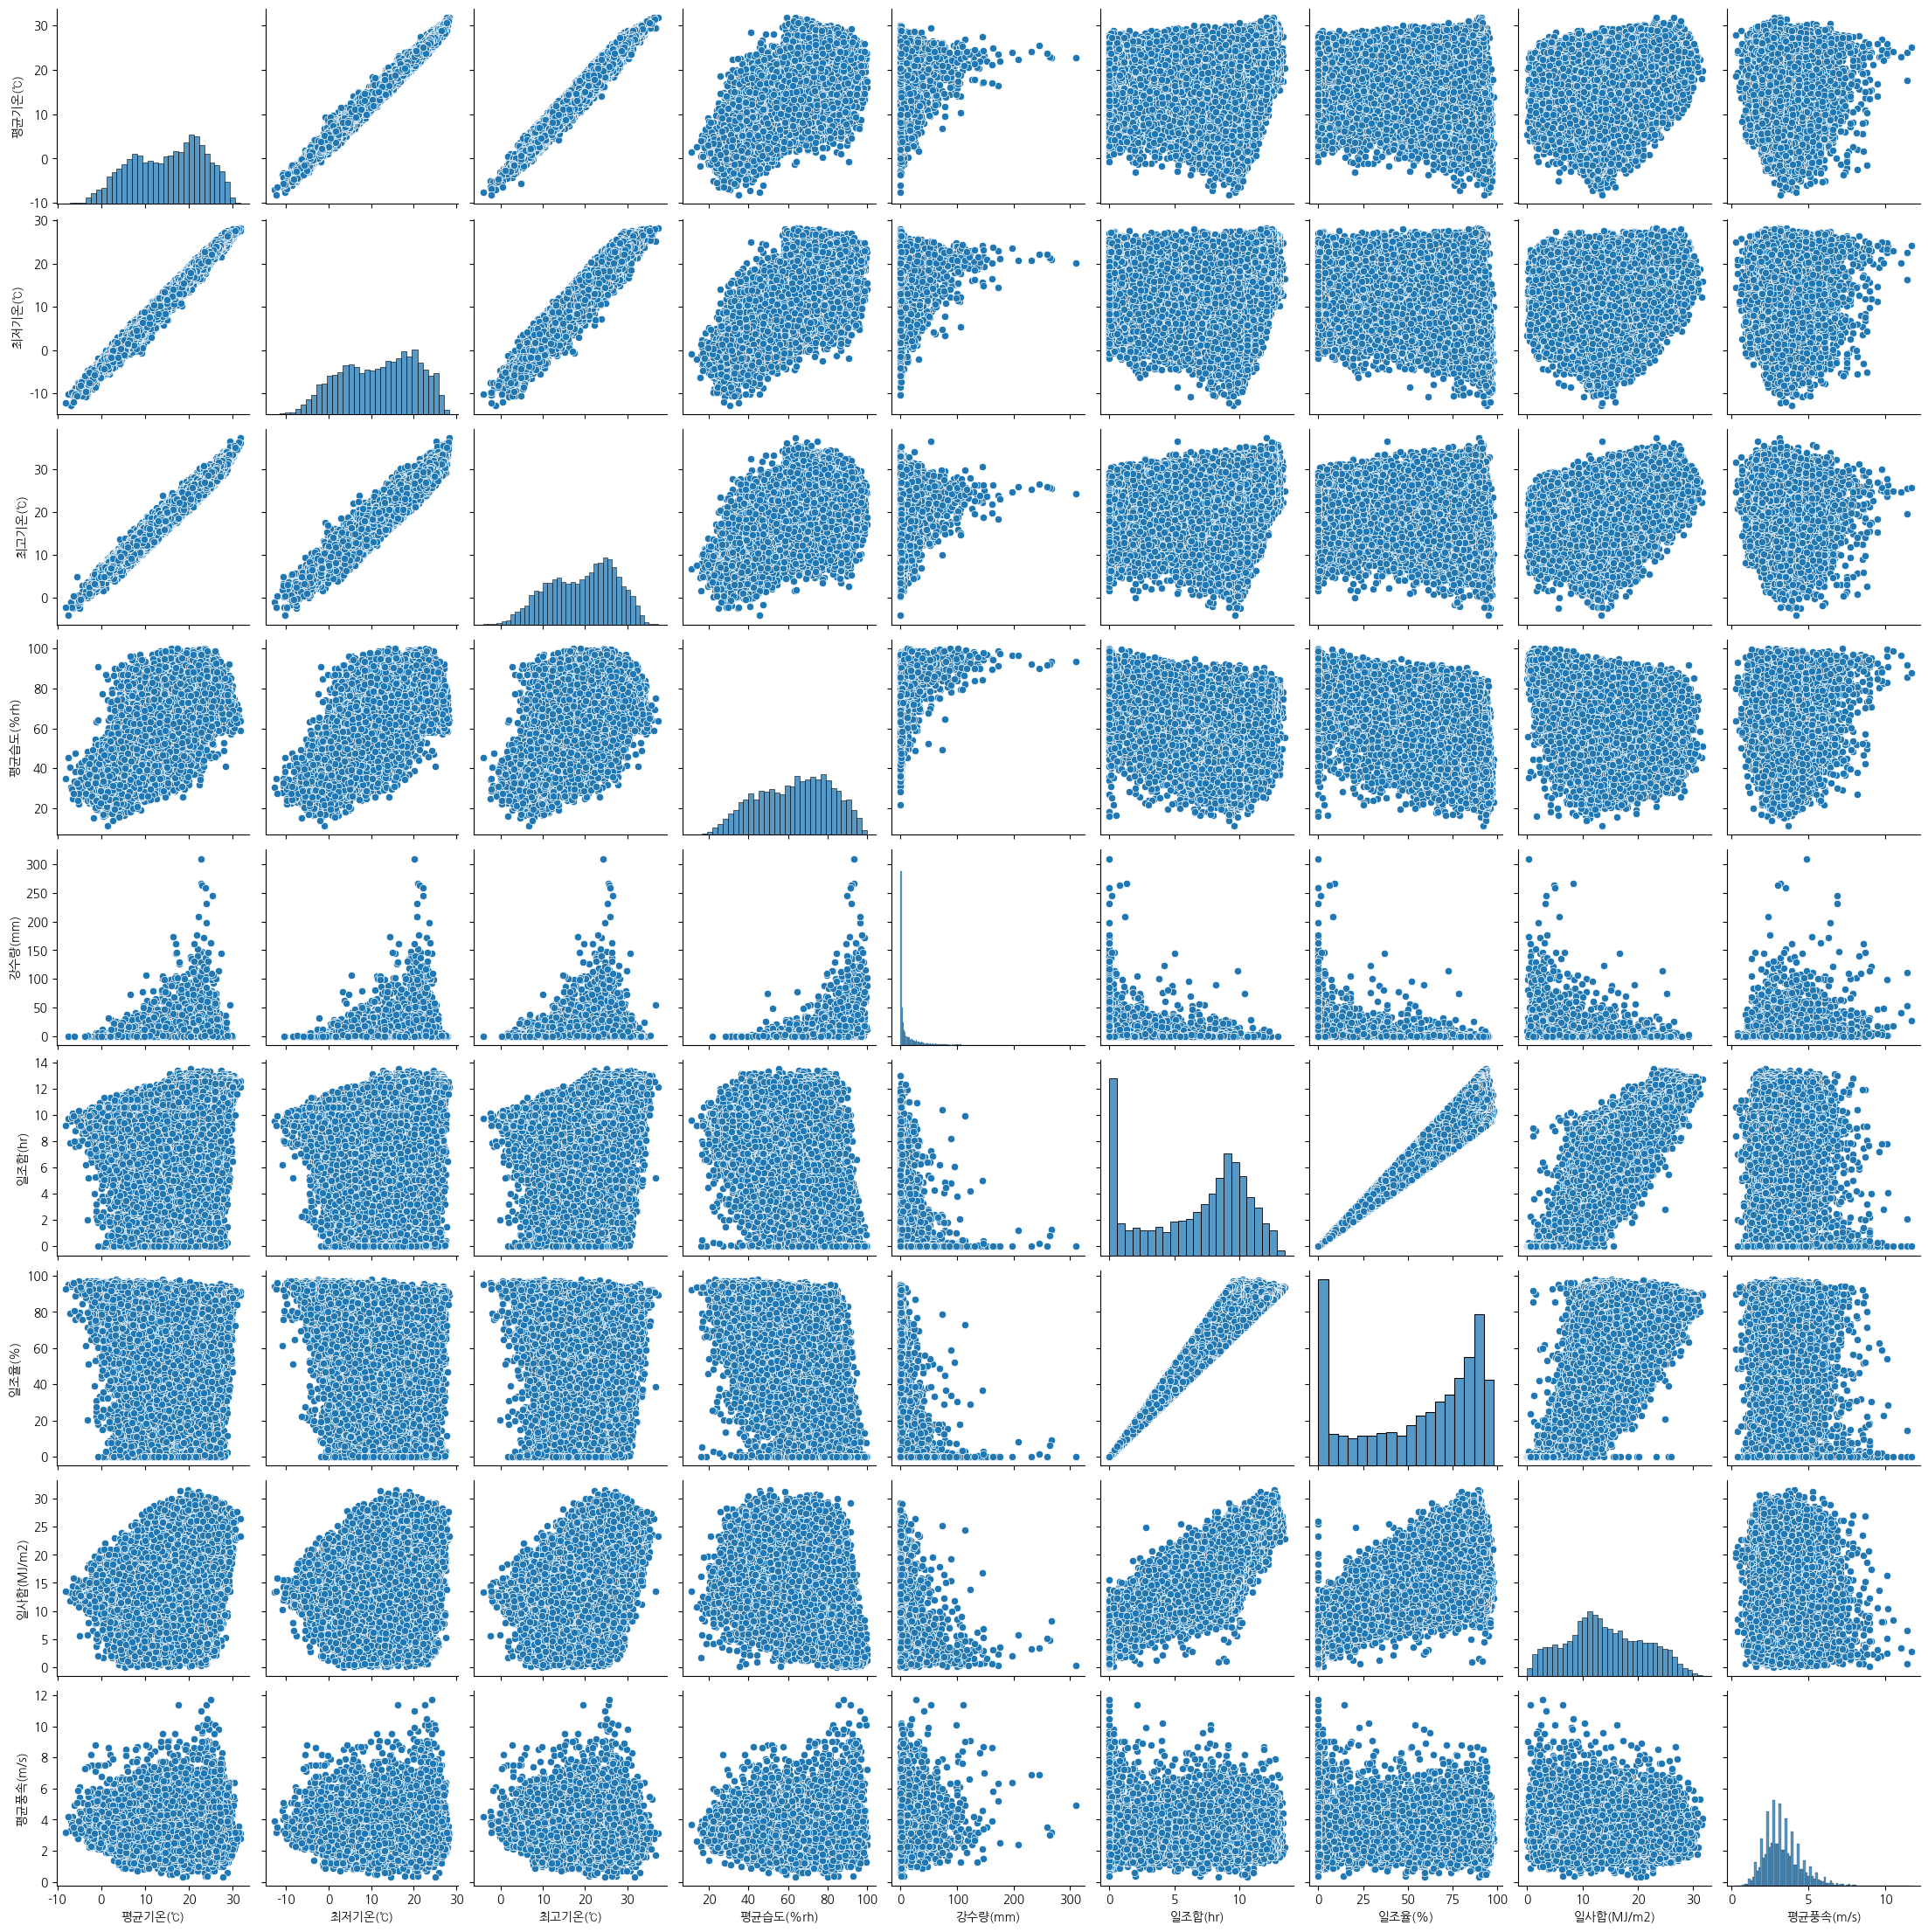

In [ ]:
sns.pairplot(df_corr)
plt.show()

#### 3.2.2.3 violinplot

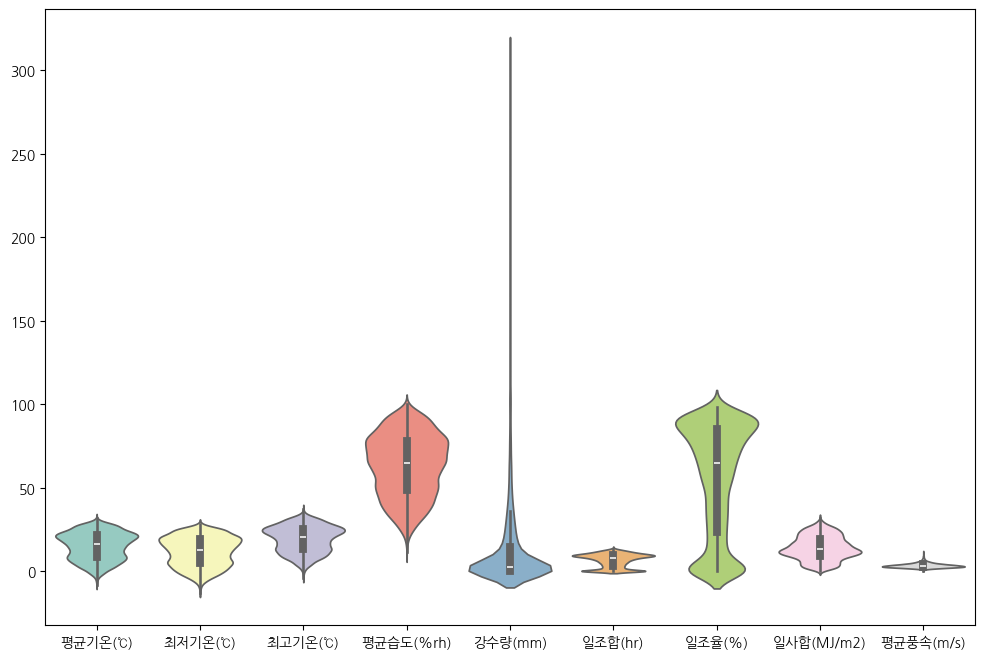

In [ ]:
dfv = df.drop(['지점', '날짜'], axis=1)
plt.figure(figsize=(12,8))
sns.violinplot(data=dfv, palette="Set3")
plt.show()

#### 3.2.2.4 boxplot

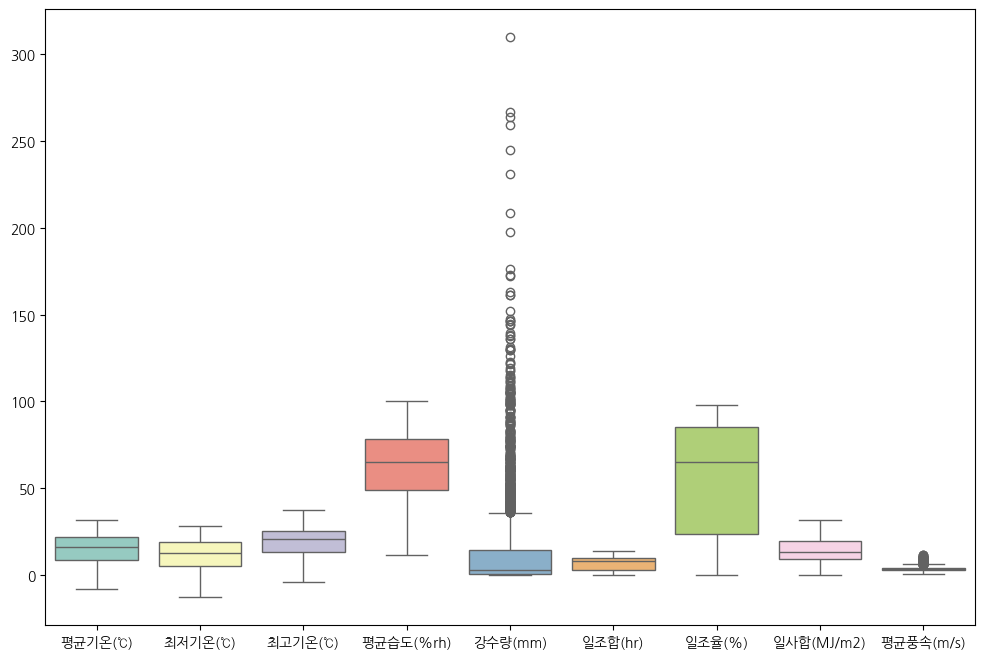

In [ ]:
df_outlier = df.drop(['지점', '날짜'], axis=1)
plt.figure(figsize=(12,8))
sns.boxplot(data=df_outlier, palette="Set3")
plt.show()

#### 3.2.2.5 scatterplot

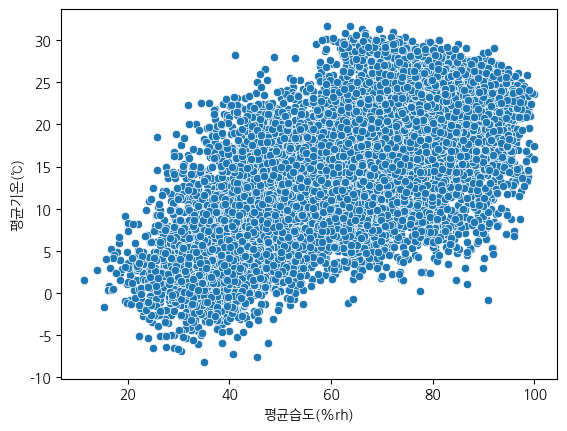

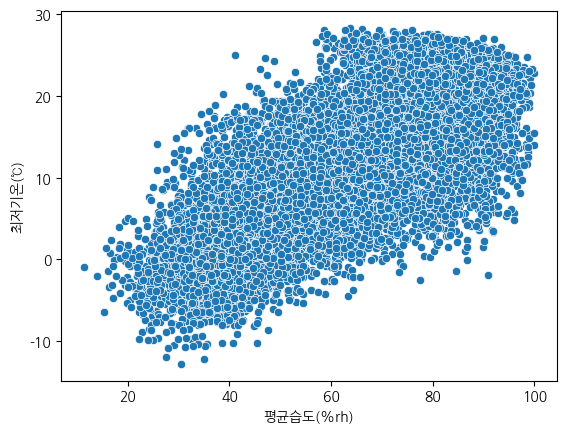

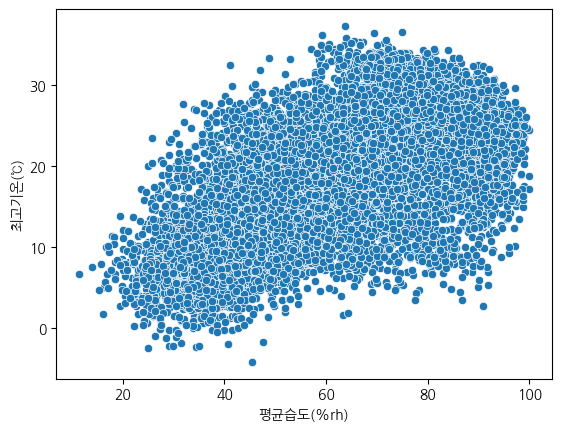

In [ ]:
col = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
for columns in col:
    sns.scatterplot(data=df, x='평균습도(%rh)', y=f'{columns}')
    plt.show()

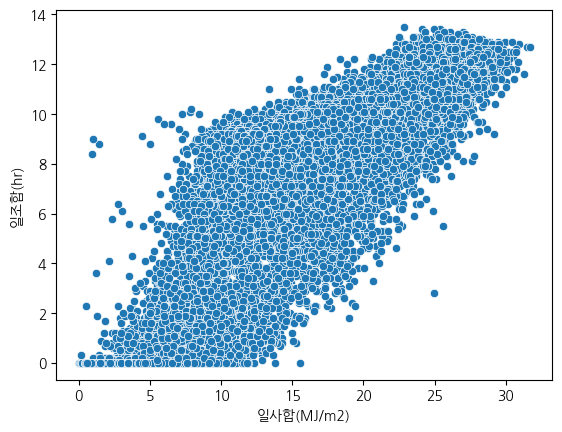

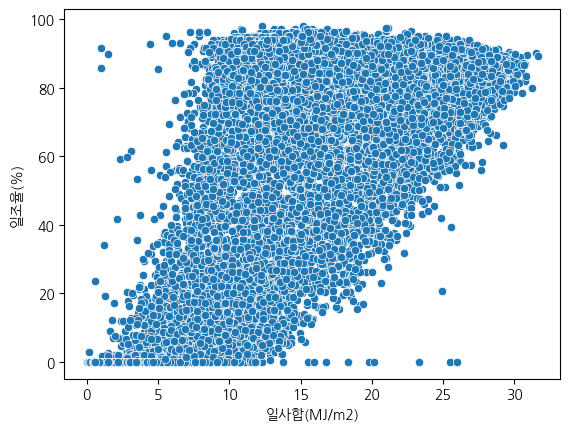

In [ ]:
col = ['일조합(hr)', '일조율(%)']
for columns in col:
    sns.scatterplot(data=df, x='일사합(MJ/m2)', y=f'{columns}')
    plt.show()

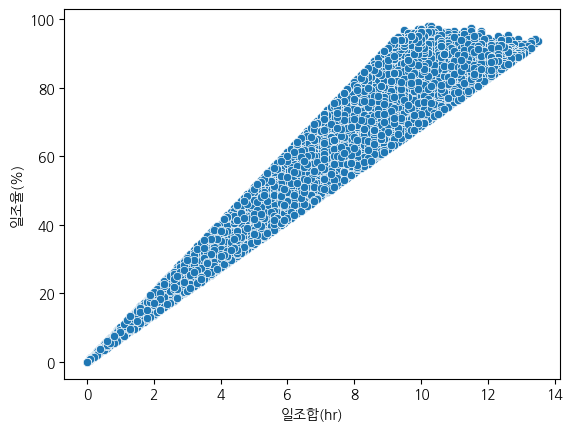

In [ ]:
sns.scatterplot(data=df, x='일조합(hr)', y='일조율(%)')
plt.show()

#### 3.2.2.6 날짜별 변수 시각화

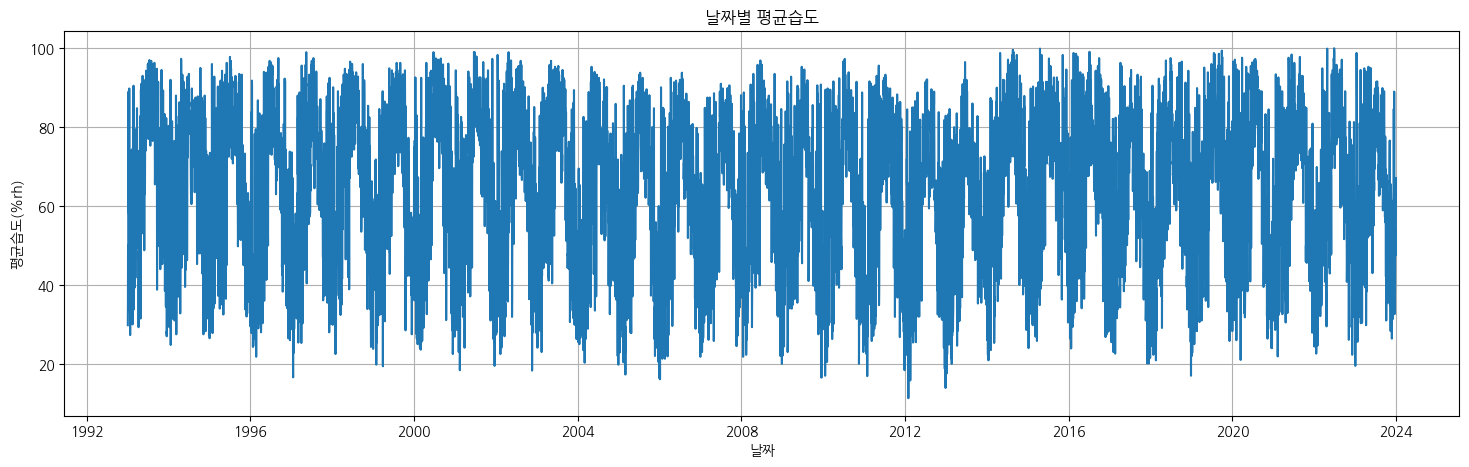

In [ ]:
# 날짜별 평균습도 시각화
daily_mean_temperature = df.groupby(df['날짜'].dt.date)['평균습도(%rh)'].mean()

plt.figure(figsize=(18, 5))
plt.plot(daily_mean_temperature.index, daily_mean_temperature.values)
plt.title("날짜별 평균습도")
plt.xlabel("날짜")
plt.ylabel("평균습도(%rh)")
plt.grid(True);

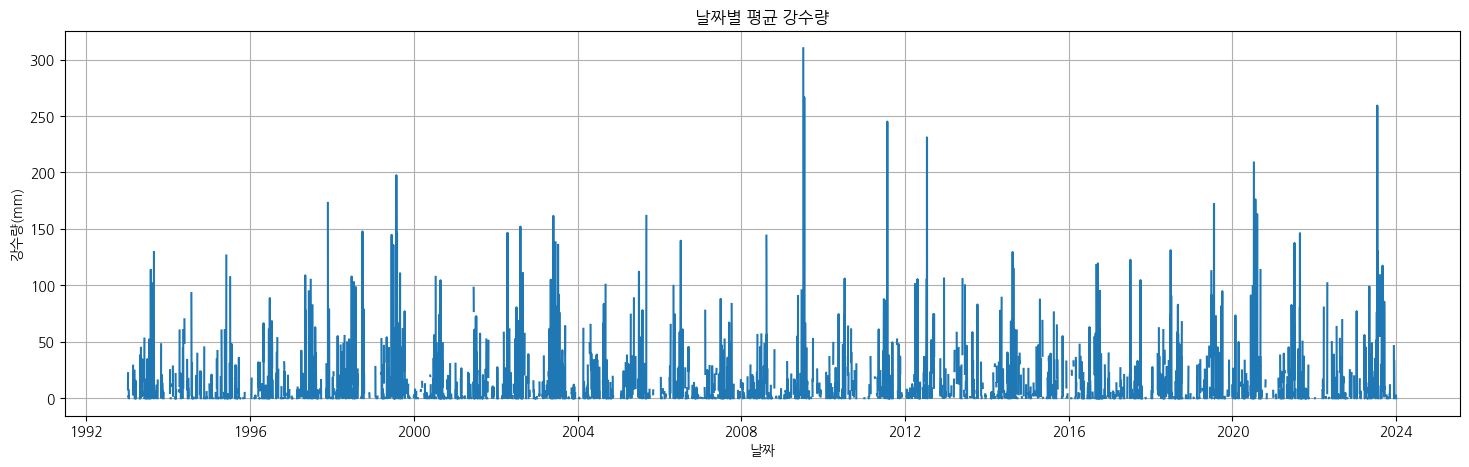

In [ ]:
# 날짜별 평균 강수량 시각화
daily_mean_temperature = df.groupby(df['날짜'].dt.date)['강수량(mm)'].mean()

plt.figure(figsize=(18, 5))
plt.plot(daily_mean_temperature.index, daily_mean_temperature.values)
plt.title("날짜별 평균 강수량")
plt.xlabel("날짜")
plt.ylabel("강수량(mm)")
plt.grid(True);

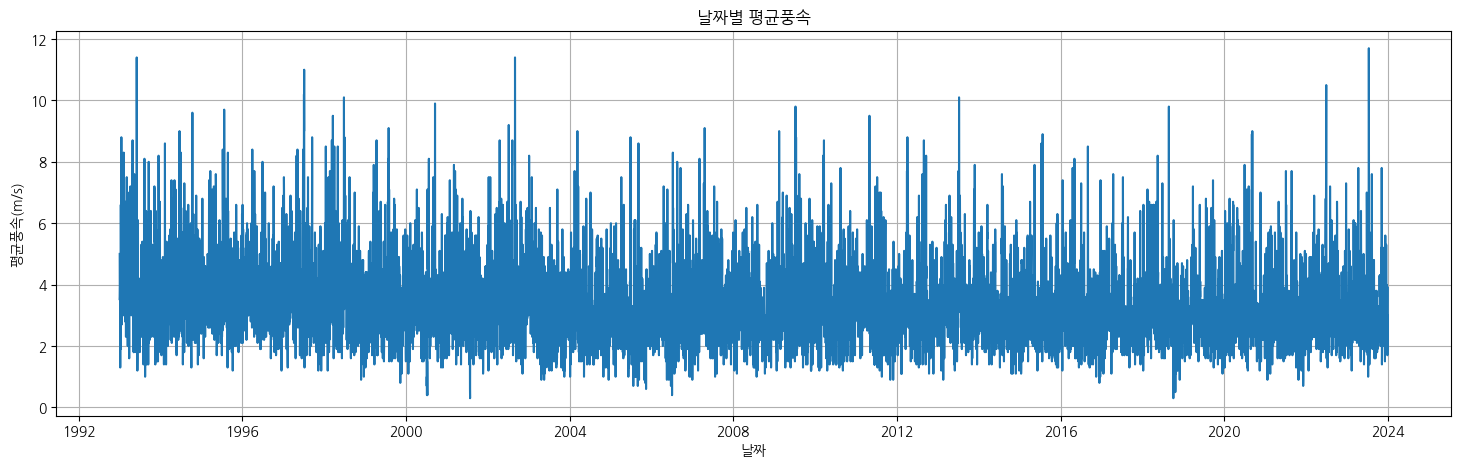

In [ ]:
# 날짜별 평균풍속 시각화
daily_mean_temperature = df.groupby(df['날짜'].dt.date)['평균풍속(m/s)'].mean()

plt.figure(figsize=(18, 5))
plt.plot(daily_mean_temperature.index, daily_mean_temperature.values)
plt.title("날짜별 평균풍속")
plt.xlabel("날짜")
plt.ylabel("평균풍속(m/s)")
plt.grid(True);

## 3.3 불필요한 컬럼 제거

In [ ]:
df.drop(['지점', '일조합(hr)', '일조율(%)'], axis=1, inplace=True)

## 3.4 컬럼명 변경

In [ ]:
df.columns = ['날짜', '평균기온', '최저기온', '최고기온', '평균습도', '강수량', '일사합', '평균풍속']

In [ ]:
df.columns

Index(['날짜', '평균기온', '최저기온', '최고기온', '평균습도', '강수량', '일사합', '평균풍속'], dtype='object')

## 3.5 결측치 처리

In [ ]:
# 최저기온의 결측값을 바로 앞의 값으로 채움(ffill 함수 사용)
temp_null = df[df['날짜'] == '2023-05-24']
print(temp_null)
df['최저기온'].fillna(method='ffill', inplace=True)
print(temp_null)

              날짜  평균기온  최저기온  최고기온  평균습도  강수량  일사합  평균풍속
11100 2023-05-24  18.5   NaN  22.9  65.6  NaN  NaN   2.4
              날짜  평균기온  최저기온  최고기온  평균습도  강수량  일사합  평균풍속
11100 2023-05-24  18.5   NaN  22.9  65.6  NaN  NaN   2.4


In [ ]:
# 강수량의 기존 0값 -> 0.01 / 결측값 -> 0
df['강수량'] = df['강수량'].replace(0, 0.01)
df['강수량'] = df['강수량'].fillna(0)

In [ ]:
# 평균풍속의 결측값은 전체 평균풍속의 평균값으로 대체
df['평균풍속'] = df['평균풍속'].fillna(df['평균풍속'].mean())

In [ ]:
df.isnull().sum()

날짜       0
평균기온     0
최저기온     0
최고기온     0
평균습도     2
강수량      0
일사합     95
평균풍속     0
dtype: int64

In [ ]:
df[df['평균습도'].isnull()]

날짜  평균기온  최저기온  최고기온  평균습도   강수량   일사합  평균풍속
11105 2023-05-29  20.2  18.6  22.0   NaN  48.8  2.20   3.0
11106 2023-05-30  18.6  17.4  20.0   NaN  18.8  6.62   2.6

In [ ]:
df['월'] = df['날짜'].dt.month
dfh = df[df['월'] == 5]
df['평균습도'] = df['평균습도'].fillna(dfh['평균습도'].mean().round(1))

In [ ]:
null_sun = sorted(df[df['일사합'].isnull()]['월'].unique())

In [ ]:
for i in null_sun:
    dfs = df[df['월'] == i]
    df[df['월']==i] = df[df['월']==i].fillna(dfs['일사합'].mean().round(1))

In [ ]:
df.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
평균습도    0
강수량     0
일사합     0
평균풍속    0
월       0
dtype: int64

In [ ]:
df.drop('월', axis=1, inplace=True)

In [ ]:
df.head()

날짜  평균기온  최저기온  최고기온  평균습도  강수량    일사합  평균풍속
0 1993-01-01   6.1   2.4  11.9  29.8  0.0  10.93   5.0
1 1993-01-02   7.8   4.2  13.2  34.5  0.0  10.60   3.5
2 1993-01-03   8.2   4.9  12.3  50.0  0.0   7.97   3.6
3 1993-01-04   5.0   2.5   9.5  44.3  0.0   6.15   3.9
4 1993-01-05   4.8   0.0  11.1  33.3  0.0  10.54   3.6

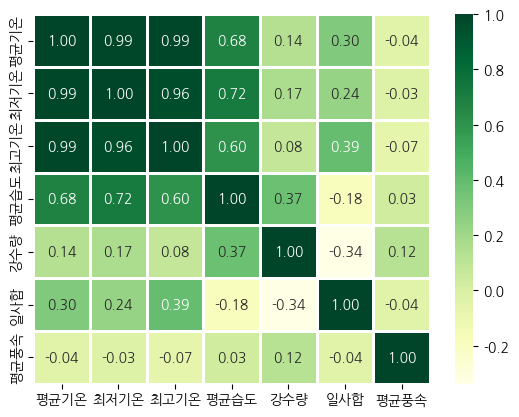

In [ ]:
df_corr = df.drop('날짜', axis=1).corr()
sns.heatmap(df_corr, linecolor='white', linewidth=1, annot=True, fmt='.2f', cmap='YlGn')
plt.show()

## 3.6 파생변수 생성

### 3.6.1 VIF 다중공선성 진단

In [ ]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    vif['Feature'] = df.columns
    return vif

In [ ]:
df_vif = df.drop(['평균기온', '날짜'], axis=1)
vif_result = calculate_vif(df_vif)
print(vif_result)

   VIF_Factor Feature
0   28.010176    최저기온
1   88.027125    최고기온
2   19.357230    평균습도
3    1.379306     강수량
4   10.256034     일사합
5    7.040837    평균풍속


### 3.6.2 극값평균_습도 파생변수 생성

In [ ]:
df['극값평균_습도'] = ((df['최고기온'] + df['최저기온']) / 2) * df['평균습도']

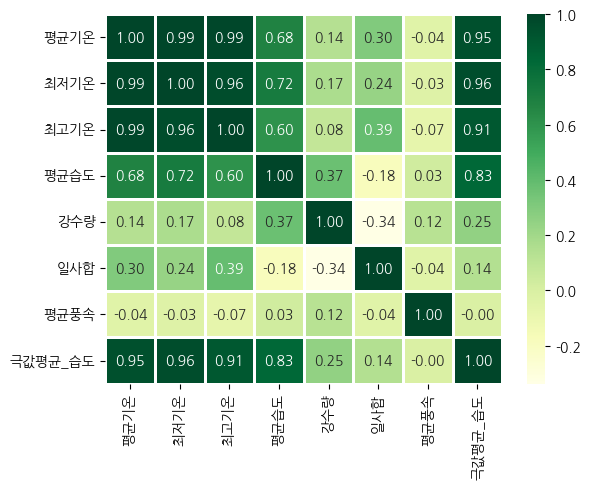

In [ ]:
df_corr = df.drop('날짜', axis=1).corr()
sns.heatmap(df_corr, linecolor='white', linewidth=1, annot=True, fmt='.2f', cmap='YlGn')
plt.show()

In [ ]:
df_vif = df.drop(['평균기온', '날짜', '최고기온', '최저기온', '평균습도'], axis=1)
vif_result = calculate_vif(df_vif)
print(vif_result)

   VIF_Factor  Feature
0    1.362094      강수량
1    4.562518      일사합
2    4.010243     평균풍속
3    3.524871  극값평균_습도


In [ ]:
df.drop(['최고기온', '최저기온', '평균습도'], axis=1, inplace=True)

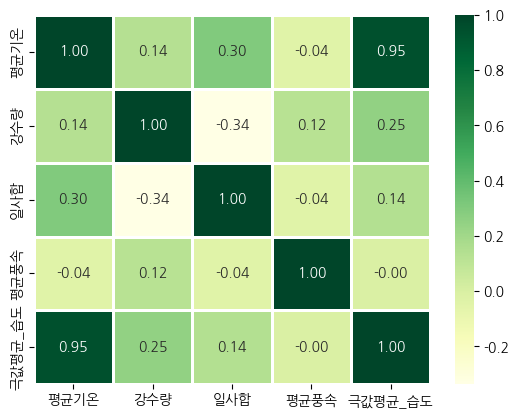

In [ ]:
df_corr = df.drop('날짜', axis=1).corr()
sns.heatmap(df_corr, linecolor='white', linewidth=1, annot=True, fmt='.2f', cmap='YlGn')
plt.show()

In [ ]:
df.head()

날짜  평균기온  강수량    일사합  평균풍속  극값평균_습도
0 1993-01-01   6.1  0.0  10.93   5.0  213.070
1 1993-01-02   7.8  0.0  10.60   3.5  300.150
2 1993-01-03   8.2  0.0   7.97   3.6  430.000
3 1993-01-04   5.0  0.0   6.15   3.9  265.800
4 1993-01-05   4.8  0.0  10.54   3.6  184.815

# 4 Modeling

In [ ]:
# 재현율을 위한 seed 설정
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

## 4.1 ARIMA

### 4.1.1 ARIMA 수행 전 데이터 정제

In [ ]:
# ARIMA를 위한 새로운 데이터프레임 생성
df_arima = df.copy()
df_arima = df_arima[['날짜', '평균기온']]
df_arima.set_index('날짜', inplace=True)
df_arima.index.name = None
df_arima.head()

평균기온
1993-01-01   6.1
1993-01-02   7.8
1993-01-03   8.2
1993-01-04   5.0
1993-01-05   4.8

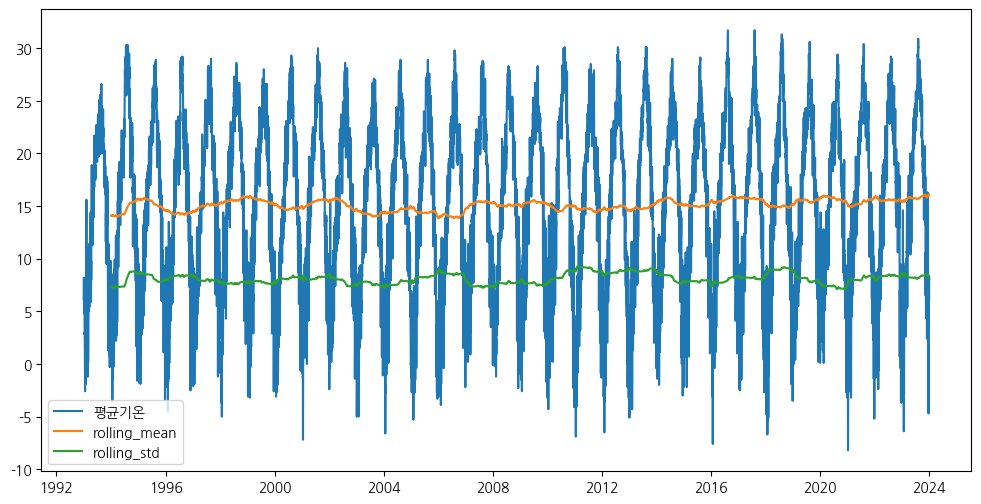

In [ ]:
# 차분을 하지 않았을 때
plt.figure(figsize=(12, 6))
plt.plot(df_arima, label='평균기온')
plt.plot(df_arima.rolling(window=365).mean(), label='rolling_mean')
plt.plot(df_arima.rolling(window=365).std(), label='rolling_std')
plt.legend()
plt.show()

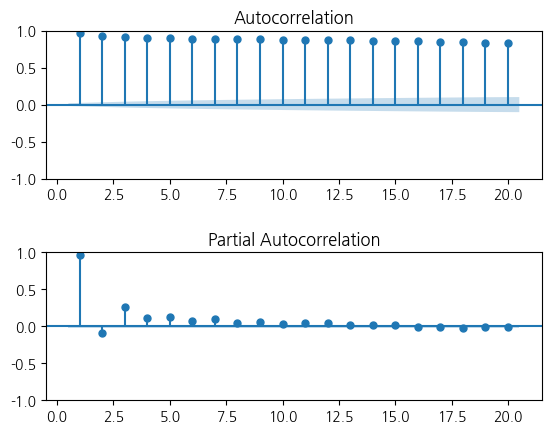

In [ ]:
# 차분 전 ACF, PACF 확인
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df_arima, lags = 20, zero = False, ax=ax1)
sgt.plot_pacf(df_arima, lags = 20, zero = False, ax=ax2)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# 차분을 위한 데이터프레임 생성
df_diff = df_arima.copy()
df_diff = df_diff.diff().dropna()
df_diff

평균기온
1993-01-02   1.7
1993-01-03   0.4
1993-01-04  -3.2
1993-01-05  -0.2
1993-01-06   2.2
...          ...
2023-12-27   2.7
2023-12-28   0.8
2023-12-29  -1.9
2023-12-30   2.1
2023-12-31  -0.1

[11321 rows x 1 columns]

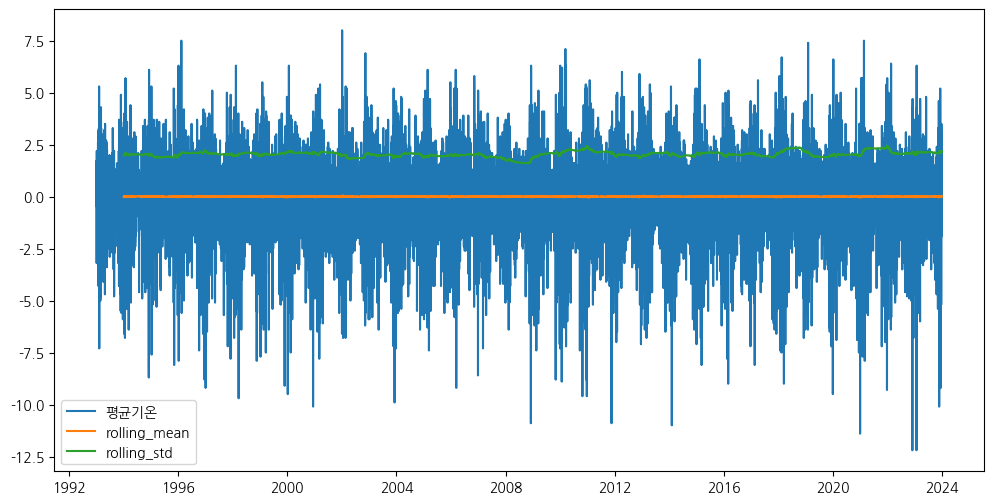

In [ ]:
# 차분을 한번 했을 때
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='평균기온')
plt.plot(df_diff.rolling(window=365).mean(), label='rolling_mean')
plt.plot(df_diff.rolling(window=365).std(), label='rolling_std')
plt.legend()
plt.show()

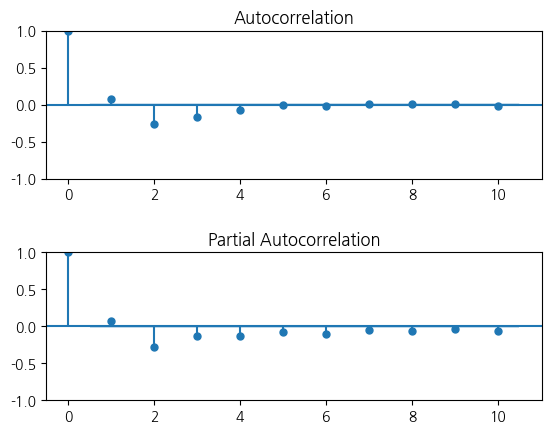

In [ ]:
# 차분 후 ACF, PACF 확인
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df_diff, lags = 10, ax=ax1)
sgt.plot_pacf(df_diff, lags = 10, ax=ax2)

plt.subplots_adjust(hspace=0.5)
plt.show()

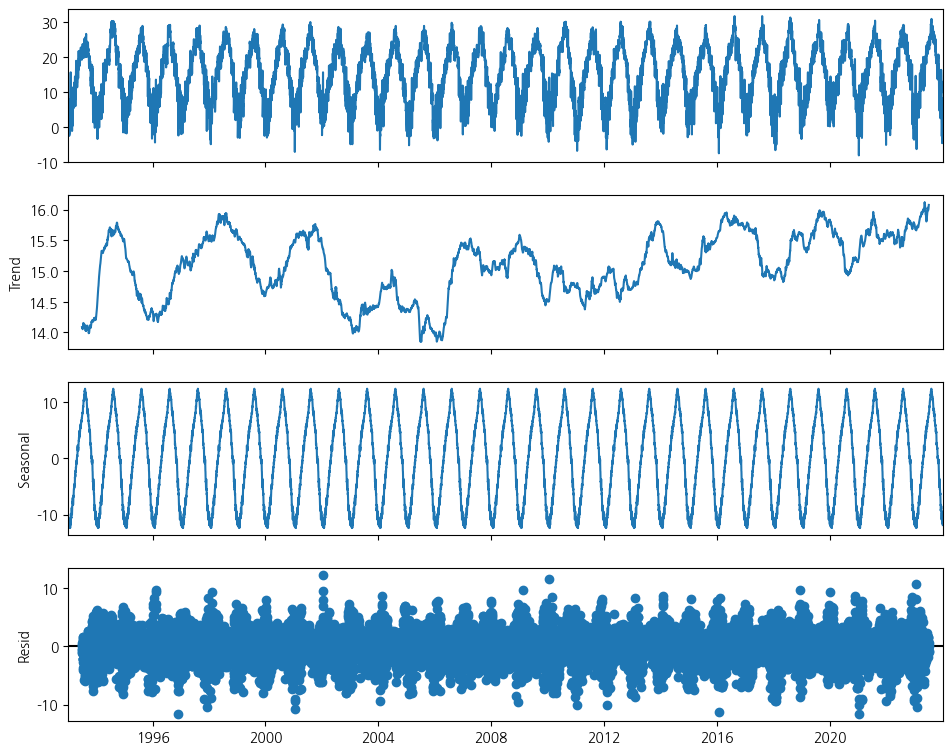

In [ ]:
# 시계열 분해를 통해 정상성 확인
result = sm.tsa.seasonal_decompose(df_arima, model='additive', period=365)

fig = result.plot()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
# adf test
# 임계값보다 작으므로 귀무 가설을 기각하고 시계열 데이터가 안정적이라는 결론을 내릴 수 있음
adf = adfuller(df_arima['평균기온'])
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -9.024005348987503
p-value: 5.674493748304214e-15
Critical Values:
	1%: -3.4309298057453086
	5%: -2.8617962428539996
	10%: -2.5669063929618603


In [ ]:
# kpss test
# H0: 시계열이 안정적입니다, H1: 시계열이 안정적이지 않습니다.
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}: {value}')

kpss_test(df_arima['평균기온'])

KPSS Statistic: 0.039350599984706976
p-value: 0.1
num lags: 61
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


/tmp/ipykernel_250186/972370170.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df)


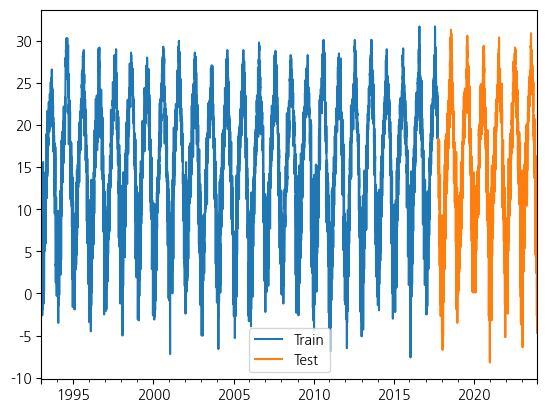

In [ ]:
# ARIMA 모델 수행을 위해 train_test 분리
train = df_arima['평균기온'][:int(0.8*len(df))]
test = df_arima['평균기온'][int(0.8*len(df)):]

# 분리가 제대로 이루어졌는지 그래프를 통해 확인
train.plot(label='Train')
test.plot(label='Test')
plt.legend()
plt.show()

In [ ]:
# kpss와 adf를 이용하여 최적의 d값을 계산
# kpss 검정은 시계열이 평균 또는 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인할 수 있음(H0=시계열이 안정적입니다, H1=시계열이 안정적이지 않습니다.)
# adf 검정은 시계열이 안정적인지 여부를 확인하는데 이용되는 방법(H0=시계열이 안정적이지 않습니다, H1=시계열이 안정적입니다.)
kpss_diffs = pm.arima.ndiffs(train, alpha=0.05, test='kpss', max_d=5)
adf_diffs = pm.arima.ndiffs(train, alpha=0.05, test='adf', max_d=5)
n_diffs = max(kpss_diffs, adf_diffs)

print(f"Optimized 'd' = {n_diffs}")

Optimized 'd' = 0


### 4.1.2 Auto_ARIMA_Seasonal

In [ ]:
# Auto_ARIMA_Seasonal 모델 생성
model_arima_s = pm.auto_arima(y=train, d=n_diffs, start_p=0, start_q=0, max_p=5, max_q=5,
                   D=n_diffs, start_P=0, start_Q=0, max_P=5, max_Q=5, m=12,
                   seasonal=True, error_action='warn', trace=True,
                   suppress_warnings=True, stepwise=True, random_state=42)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=63605.725, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=38226.676, Time=6.13 sec


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=48778.638, Time=3.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=77106.919, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=38230.299, Time=0.26 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=38227.225, Time=20.25 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=8.89 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=38226.823, Time=2.61 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=18.45 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=50164.920, Time=3.59 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=38158.966, Time=7.85 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=38164.107, Time=0.59 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=38159.349, Time=27.37 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=12.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=38159.163, Time=3.27 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=25.78 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=37564.806, Time=9.79 sec

/home/kdt-admin/miniconda3/envs/team_1/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,0,0)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=37096.702, Time=18.14 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=37083.328, Time=5.30 sec
 ARIMA(3,0,1)(0,0,1)[12] intercept   : AIC=37078.975, Time=9.50 sec
 ARIMA(3,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=17.75 sec
 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=37077.165, Time=22.14 sec
 ARIMA(3,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=39.30 sec
 ARIMA(3,0,1)(0,0,3)[12] intercept   : AIC=37078.492, Time=87.93 sec
 ARIMA(3,0,1)(1,0,3)[12] intercept   : AIC=inf, Time=178.90 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=37921.897, Time=14.13 sec
 ARIMA(3,0,0)(0,0,2)[12] intercept   : AIC=37565.094, Time=9.92 sec
 ARIMA(4,0,1)(0,0,2)[12] intercept   : AIC=37059.863, Time=31.98 sec
 ARIMA(4,0,1)(0,0,1)[12] intercept   : AIC=37062.216, Time=11.40 sec
 ARIMA(4,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=41.42 sec
 ARIMA(4,0,1)(0,0,3)[12] intercept   : AIC=37061.036, Time=90.73 sec

In [ ]:
# 최적화된 ARIMA 모델 분석
model_arima_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 9057
Model:             SARIMAX(4, 0, 2)x(0, 0, 2, 12)   Log Likelihood              -18506.500
Date:                            Fri, 12 Apr 2024   AIC                          37032.999
Time:                                    07:20:45   BIC                          37104.112
Sample:                                01-01-1993   HQIC                         37057.190
                                     - 10-18-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0738      0.016      4.526      0.000       0.042       0.106
ar.L1          0.9846      0.051     19.206      0.000       0.884       1.085
ar.L2          0.3348      0.087      3.850      0.000       0.164       0.505
ar.L3         -0.5086      0.057     -8.849      0.000      -0.621      -0.396
ar.L4          0.1842      0.021      8.695      0.000       0.143       0.226
ma.L1          0.0109      0.050      0.218      0.828      -0.087       0.109
ma.L2         -0.6590      0.036    -18.285      0.000      -0.730      -0.588
ma.S.L12       0.0284      0.010      2.907      0.004       0.009       0.048
ma.S.L24       0.0208      0.010      2.108      0.035       0.001       0.040
sigma2         3.4895      0.041     85.520      0.000       3.409       3.569
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2303.13
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.79
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

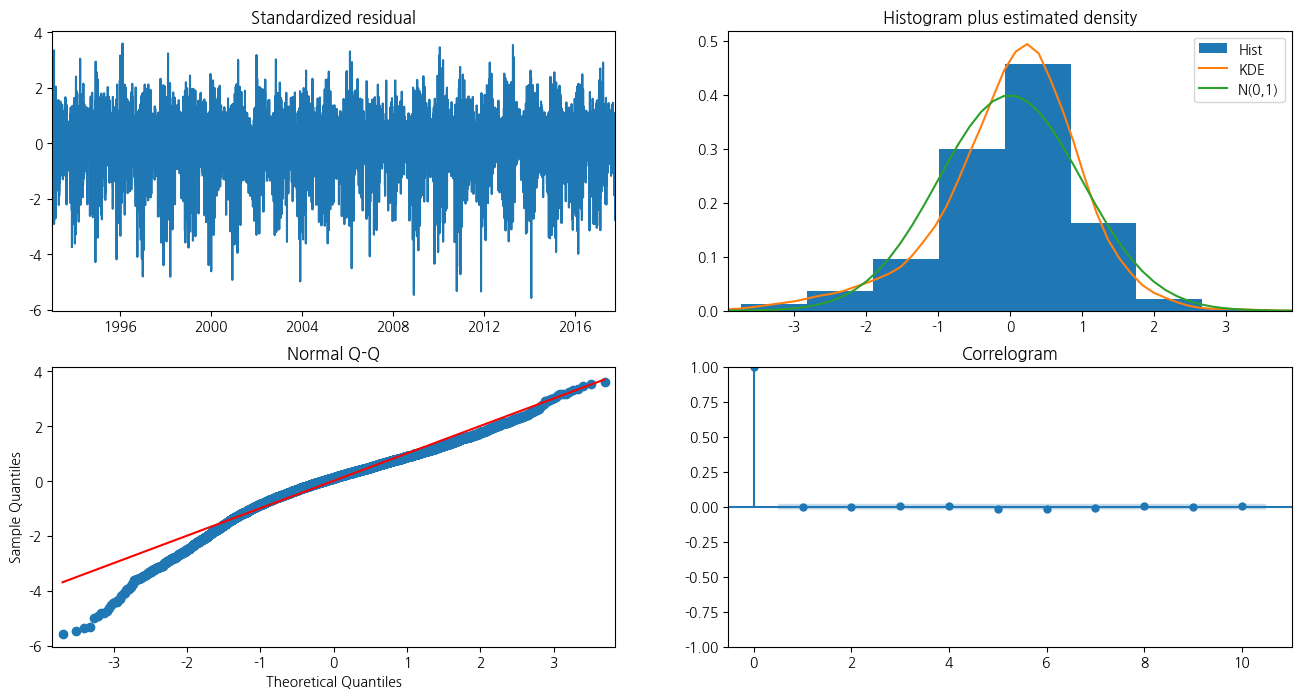

In [ ]:
# 시각화를 통한 정상성 확인
model_arima_s.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
# 트렌드만 고려한 예측 실행
pred_s = model_arima_s.predict(n_periods=len(test)).to_list()
test_pred_s = pd.DataFrame({'test':test, 'pred':pred_s}, index=test.index)
test_pred_s

test       pred
2017-10-19  17.8  17.599947
2017-10-20  18.3  17.871049
2017-10-21  18.4  17.939330
2017-10-22  18.3  18.032629
2017-10-23  15.3  17.927233
...          ...        ...
2023-12-27   7.2  14.846699
2023-12-28   8.0  14.846699
2023-12-29   6.1  14.846699
2023-12-30   8.2  14.846699
2023-12-31   8.1  14.846699

[2265 rows x 2 columns]

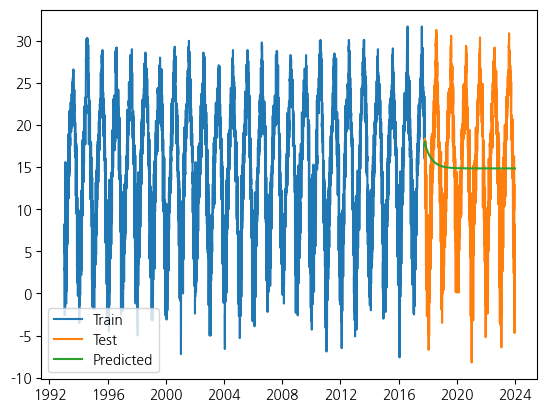

In [ ]:
# 예측 결과 확인
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_s.pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# 한 지점에 대한 예측을 진행하고 모델을 업데이트 하는 방식으로 예측 진행
# 트렌드 이외에도 변동요인들이 모두 반영됨
def forecast_one_step(model):
    fc, conf = model.predict(n_periods=90, return_conf_int=True)
    return fc.tolist()[0], np.asarray(conf).tolist()[0]

In [ ]:
y_pred_s = []
pred_upper_s = []
pred_lower_s = []

for new_ob in test:
    fc_s, conf_s = forecast_one_step(model_arima_s)
    y_pred_s.append(fc_s)
    pred_upper_s.append(conf_s[1])
    pred_lower_s.append(conf_s[0])
    model_arima_s.update(new_ob)

In [ ]:
# 예측 결과 확인
test_pred_s2 = pd.DataFrame({'test':test, 'pred':y_pred_s})
y_pred_s_df = test_pred_s2['pred']	# Series로 반환
y_pred_s_df

2017-10-19    17.599947
2017-10-20    18.067079
2017-10-21    18.297534
2017-10-22    18.377793
2017-10-23    18.091128
                ...    
2023-12-27     4.426870
2023-12-28     6.030793
2023-12-29     6.534761
2023-12-30     4.742859
2023-12-31     7.831799
Name: pred, Length: 2265, dtype: float64

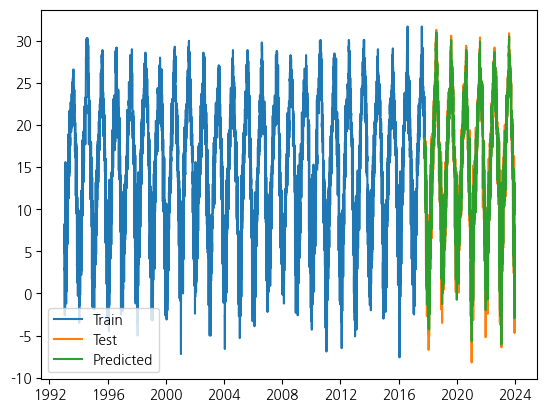

In [ ]:
# 시각화를 통한 예측 결과 확인
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_s_df, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# 업데이트된 모델 분석
model_arima_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                11322
Model:             SARIMAX(4, 0, 2)x(0, 0, 2, 12)   Log Likelihood              -23291.818
Date:                            Fri, 12 Apr 2024   AIC                          46603.636
Time:                                    11:16:14   BIC                          46676.981
Sample:                                         0   HQIC                         46628.310
                                          - 11322                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0699      0.015      4.780      0.000       0.041       0.099
ar.L1          1.0398      0.058     17.832      0.000       0.926       1.154
ar.L2          0.2317      0.101      2.304      0.021       0.035       0.429
ar.L3         -0.4500      0.065     -6.905      0.000      -0.578      -0.322
ar.L4          0.1738      0.023      7.663      0.000       0.129       0.218
ma.L1         -0.0369      0.057     -0.643      0.520      -0.150       0.076
ma.L2         -0.6129      0.041    -14.799      0.000      -0.694      -0.532
ma.S.L12       0.0225      0.008      2.661      0.008       0.006       0.039
ma.S.L24       0.0206      0.009      2.359      0.018       0.003       0.038
sigma2         3.5823      0.036     98.213      0.000       3.511       3.654
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3476.18
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.83
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 예측 모델 오차 계산(MAE, MSE, RMSE)
print(f"MAE : {mean_absolute_error(test, y_pred_s):.2f}")
print(f"MSE : {mean_squared_error(test, y_pred_s):.2f}")
print(f"RMSE : {int(np.sqrt(mean_squared_error(test, y_pred_s)))}")

MAE : 1.46
MSE : 3.98
RMSE : 1


In [ ]:
# # 모델 저장
# with open('arima_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# # 모델 불러오기
# with open('arima_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

### 4.1.3 Auto_ARIMA_Non_Seasonal

In [ ]:
# Auto_ARIMA_Non_Seasonal 모델 생성
model_ns = pm.auto_arima(y=train, d=n_diffs, start_p=0, start_q=0, max_p=5, max_q=5,
                   seasonal=False, error_action='warn', trace=True,
                   suppress_warnings=True, stepwise=True, random_state=42)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77106.919, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=65605.466, Time=0.54 sec


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=38244.570, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=38053.776, Time=1.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=37100.345, Time=2.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=37083.676, Time=2.78 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=37062.707, Time=3.86 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=37057.938, Time=5.13 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=37067.181, Time=5.94 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=37059.312, Time=6.03 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=37036.088, Time=5.48 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=36912.019, Time=4.52 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=37083.000, Time=1.12 sec
 ARIMA(3,0,2)(0,0,0

In [ ]:
# 최적화된 ARIMA 모델 분석
model_ns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9057
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -18449.010
Date:                Fri, 12 Apr 2024   AIC                          36912.019
Time:                        11:17:18   BIC                          36961.798
Sample:                    01-01-1993   HQIC                         36928.952
                         - 10-18-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5115      0.014    176.830      0.000       2.484       2.539
ar.L2         -2.0353      0.028    -72.007      0.000      -2.091      -1.980
ar.L3          0.5237      0.014     37.063      0.000       0.496       0.551
ma.L1         -1.5160      0.014   -106.271      0.000      -1.544      -1.488
ma.L2          0.1651      0.024      7.023      0.000       0.119       0.211
ma.L3          0.3600      0.010     35.084      0.000       0.340       0.380
sigma2         3.4142      0.041     83.359      0.000       3.334       3.495
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):              1866.77
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.69
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

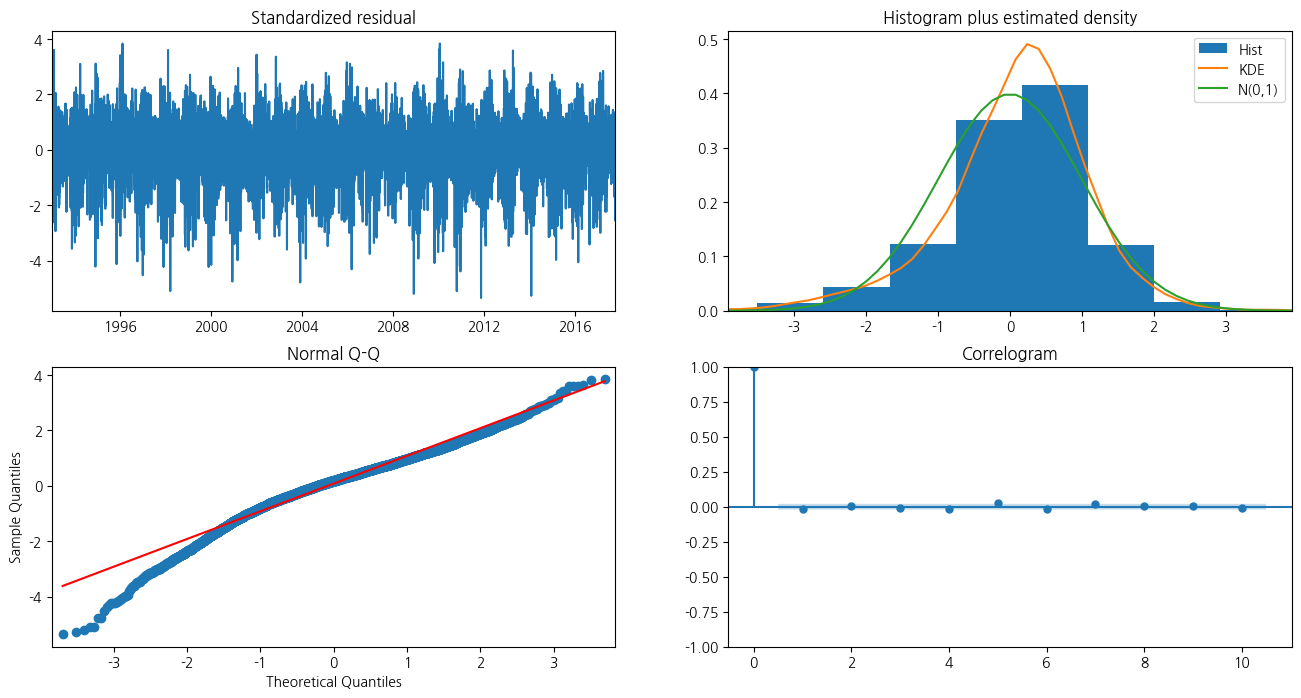

In [ ]:
# 시각화를 통한 정상성 확인
model_ns.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
# 트렌드만 고려한 예측 실행
pred_ns = model_ns.predict(n_periods=len(test)).to_list()
test_pred_ns = pd.DataFrame({'test':test, 'pred':pred_ns}, index=test.index)
test_pred_ns

test          pred
2017-10-19  17.8  1.741110e+01
2017-10-20  18.3  1.750351e+01
2017-10-21  18.4  1.748046e+01
2017-10-22  18.3  1.739571e+01
2017-10-23  15.3  1.727816e+01
...          ...           ...
2023-12-27   7.2 -2.016706e-12
2023-12-28   8.0 -2.000267e-12
2023-12-29   6.1 -1.983879e-12
2023-12-30   8.2 -1.967543e-12
2023-12-31   8.1 -1.951263e-12

[2265 rows x 2 columns]

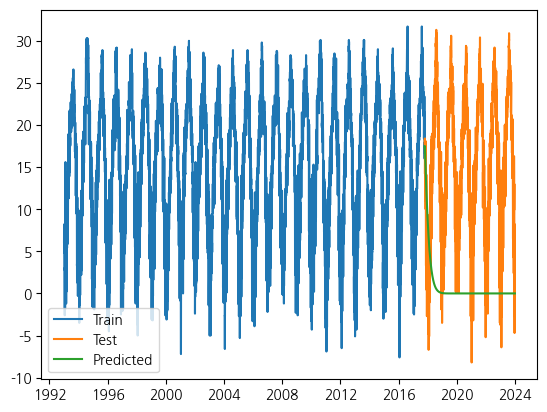

In [ ]:
# 예측 결과 확인
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ns.pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# 한 지점에 대한 예측을 진행하고 모델을 업데이트 하는 방식으로 예측 진행
y_pred_ns = []
pred_upper_ns = []
pred_lower_ns = []

for new_ob in test:
    fc_ns, conf_ns = forecast_one_step(model_ns)
    y_pred_ns.append(fc_ns)
    pred_upper_ns.append(conf_ns[1])
    pred_lower_ns.append(conf_ns[0])
    model_ns.update(new_ob)

In [ ]:
# 예측 결과 확인
test_pred_ns2 = pd.DataFrame({'test':test, 'pred':y_pred_ns})
y_pred_ns_df = test_pred_ns2['pred']
y_pred_ns_df

2017-10-19    17.411103
2017-10-20    17.877008
2017-10-21    18.114659
2017-10-22    18.076385
2017-10-23    17.955802
                ...    
2023-12-27     4.502302
2023-12-28     6.173537
2023-12-29     6.372002
2023-12-30     4.504085
2023-12-31     7.321938
Name: pred, Length: 2265, dtype: float64

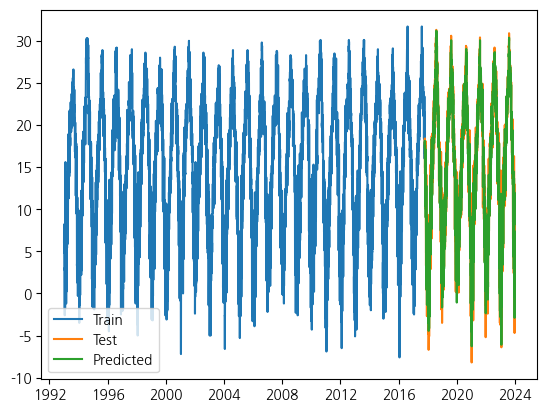

In [ ]:
# 시각화를 통한 예측 결과 확인
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_ns_df, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# 업데이트된 모델 분석
model_ns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11322
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -23201.671
Date:                Fri, 12 Apr 2024   AIC                          46417.342
Time:                        11:48:08   BIC                          46468.684
Sample:                             0   HQIC                         46434.614
                              - 11322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5147      0.013    201.154      0.000       2.490       2.539
ar.L2         -2.0374      0.025    -81.952      0.000      -2.086      -1.989
ar.L3          0.5226      0.012     42.181      0.000       0.498       0.547
ma.L1         -1.5288      0.013   -117.854      0.000      -1.554      -1.503
ma.L2          0.1817      0.022      8.407      0.000       0.139       0.224
ma.L3          0.3542      0.009     37.374      0.000       0.336       0.373
sigma2         3.5266      0.037     94.642      0.000       3.454       3.600
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              2713.83
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.71
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 예측 모델 오차 계산(MAE, MSE, RMSE)
print(f"MAE : {mean_absolute_error(test, y_pred_ns):.2f}")
print(f"MSE : {mean_squared_error(test, y_pred_ns):.2f}")
print(f"RMSE : {int(np.sqrt(mean_squared_error(test, y_pred_ns)))}")

MAE : 1.47
MSE : 3.91
RMSE : 1


## 4.2 DNN

In [ ]:
# dnn
# RobustScaler
input_length = 90
output_length = 90

# 데이터 정규화
scaler = RobustScaler()
df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # '날짜' 컬럼 제외한 모든 컬럼 정규화

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X, y = create_dataset(df_normalized, input_length, output_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 모델 구성
model_dnn = Sequential()
model_dnn.add(Flatten(input_shape=(input_length, df_normalized.shape[1])))  # 입력 데이터를 1차원으로 평탄화
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(output_length))
optimizer = RMSprop(learning_rate=0.001)
model_dnn.compile(optimizer=optimizer, loss='mae')
# model_dnn.compile(optimizer='adam', loss='mae')

/home/kdt-admin/miniconda3/envs/team_1/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-12 11:48:08.530452: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 11:48:08.580571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04

In [ ]:
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 450)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        28,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 90)             │         5,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,714 (135.60 KB)

 Trainable params: 34,714 (135.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_dnn_hist = model_dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


I0000 00:00:1712922490.132918  251726 service.cc:145] XLA service 0x7f9ed00053f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712922490.132967  251726 service.cc:153]   StreamExecutor device (0): NVIDIA A16-16Q, Compute Capability 8.6
2024-04-12 11:48:10.147630: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-12 11:48:12.085808: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


182/223 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 6.5679

I0000 00:00:1712922493.633329  251726 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 5.8919 - val_loss: 0.5716
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5365 - val_loss: 0.5177
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4687 - val_loss: 0.4352
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3796 - val_loss: 0.3111
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2710 - val_loss: 0.2258
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2254 - val_loss: 0.2142
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2156 - val_loss: 0.2089
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2107 - val_loss: 0.2057
Epoch 9/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2101 - val_loss: 0.1994
Epoch 10/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2071 - val_loss: 0.1979
Epoch 11/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2068 - val_loss: 0.1988
Epoch 12/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0

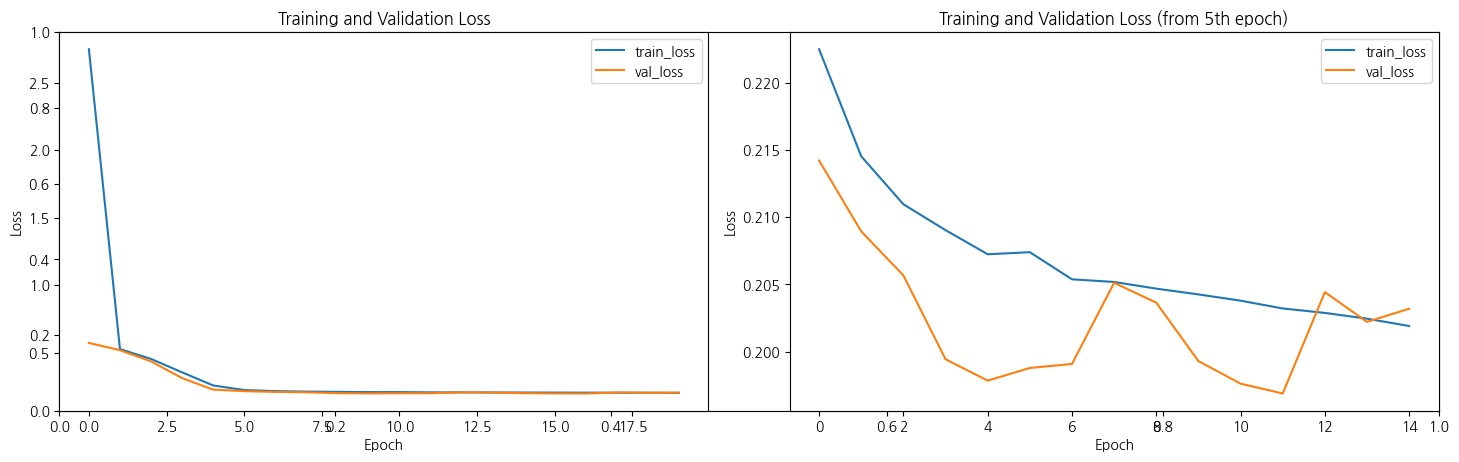

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_dnn_hist.history["loss"], label="train_loss")
ax_1.plot(model_dnn_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_dnn_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_dnn_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# DNN
# 모델 예측
y_pred = model_dnn.predict(X_test)
y_true = y_test

# 예측값과 실제값의 형태 수정
y_pred_flat = y_pred.reshape(-1)
y_true_flat = y_true.reshape(-1)

# MAE 계산
mae = mean_absolute_error(y_true_flat, y_pred_flat)

# MSE 계산
mse = mean_squared_error(y_true_flat, y_pred_flat)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Absolute Error: 0.24430855871103935
Mean Squared Error: 0.12300875336823845
Root Mean Squared Error: 0.350726037482589


## 4.3 SimpleRNN

In [ ]:
# simplernn
# RobustScaler
input_length = 90
output_length = 90

# 데이터 정규화
scaler = RobustScaler()
df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # '날짜' 컬럼 제외한 모든 컬럼 정규화

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X, y = create_dataset(df_normalized, input_length, output_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 모델 구성
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(input_length, df_normalized.shape[1])))
model_rnn.add(Dense(output_length))
optimizer = RMSprop(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='mae')

/home/kdt-admin/miniconda3/envs/team_1/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │         4,590 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,390 (28.87 KB)

 Trainable params: 7,390 (28.87 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn_hist = model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1.2968 - val_loss: 0.3582
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3466 - val_loss: 0.2831
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3031 - val_loss: 0.2631
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2823 - val_loss: 0.2880
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2676 - val_loss: 0.2766
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2608 - val_loss: 0.2684
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2563 - val_loss: 0.2432
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2477 - val_loss: 0.2459
Epoch 9/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2429 - val_loss: 0.2371
Epoch 10/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2312 - val_loss: 0.2286
Epoch 11/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2266 - val_loss: 0.2243
Epoch 12/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 

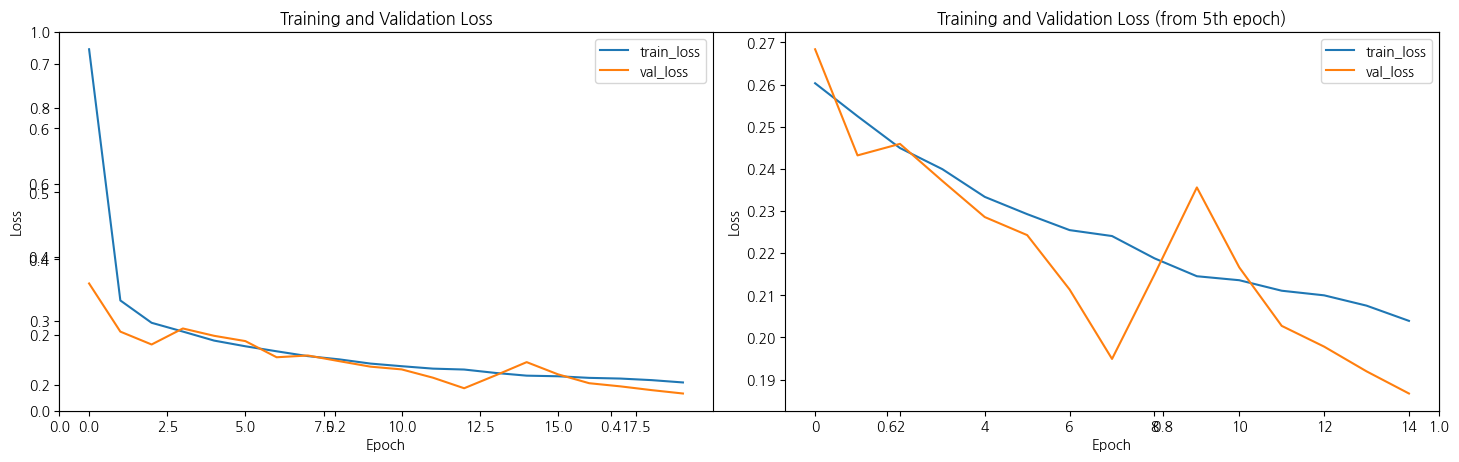

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_rnn_hist.history["loss"], label="train_loss")
ax_1.plot(model_rnn_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_rnn_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_rnn_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# SimpleRNN
# 모델 예측
y_pred = model_rnn.predict(X_test)
y_true = y_test

# 예측값과 실제값의 형태 수정
y_pred_flat = y_pred.reshape(-1)
y_true_flat = y_true.reshape(-1)

# MAE 계산
mae = mean_absolute_error(y_true_flat, y_pred_flat)

# MSE 계산
mse = mean_squared_error(y_true_flat, y_pred_flat)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Absolute Error: 0.20463931600301236
Mean Squared Error: 0.0758184817772994
Root Mean Squared Error: 0.27535156033205876


## 4.4 LSTM

In [ ]:
# lstm
# RobustScaler
input_length = 90
output_length = 90

# 데이터 정규화
scaler = RobustScaler()
df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # '날짜' 컬럼 제외한 모든 컬럼 정규화

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X, y = create_dataset(df_normalized, input_length, output_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 모델 구성
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(input_length, df_normalized.shape[1])))
model_lstm.add(Dense(output_length))
optimizer = RMSprop(learning_rate=0.0001)
model_lstm.compile(optimizer=optimizer, loss='mae')

/home/kdt-admin/miniconda3/envs/team_1/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4.4.1 LSTM 하이퍼파라미터 튜닝해보기

In [ ]:
# # lstm
# # RobustScaler
# input_length = 90
# output_length = 90

# # 데이터 정규화
# scaler = RobustScaler()
# df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # 날짜 열을 제외한 모든 열에 대해 정규화

# def create_dataset(data, input_length, output_length):
#     X, y = [], []
#     for i in range(len(data) - input_length - output_length + 1):
#         X.append(data[i:i + input_length, :])  # 날짜 열을 제외한 모든 열을 포함하여 입력 데이터 생성
#         y.append(data[i + input_length:i + input_length + output_length, 0])  # 평균기온 열만을 타겟 데이터로 사용
#     return np.array(X), np.array(y)

# # 데이터셋 생성
# X, y = create_dataset(df_normalized, input_length, output_length)

# # 데이터를 훈련 및 테스트 세트로 분할
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # 모델 구성
# model_lstm = Sequential()
# model_lstm.add(LSTM(units=100, activation='relu', input_shape=(input_length, df_normalized.shape[1]), return_sequences=True))
# model_lstm.add(LSTM(units=50, activation='relu'))
# model_lstm.add(Dense(output_length))
# optimizer = RMSprop(learning_rate=0.001)
# model_lstm.compile(optimizer=optimizer, loss='mae')

In [ ]:
# # lstm
# # RobustScaler
# input_length = 90
# output_length = 90

# # 데이터 정규화
# scaler = RobustScaler()
# df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # 날짜 열을 제외한 모든 열에 대해 정규화

# def create_dataset(data, input_length, output_length):
#     X, y = [], []
#     for i in range(len(data) - input_length - output_length + 1):
#         X.append(data[i:i + input_length, :])  # 날짜 열을 제외한 모든 열을 포함하여 입력 데이터 생성
#         y.append(data[i + input_length:i + input_length + output_length, 0])  # 평균기온 열만을 타겟 데이터로 사용
#     return np.array(X), np.array(y)

# # 데이터셋 생성
# X, y = create_dataset(df_normalized, input_length, output_length)

# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # 새로운 모델 구조 정의
# model_lstm = Sequential()
# model_lstm.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(input_length, df_normalized.shape[1])))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(LSTM(units=64, activation='relu', return_sequences=True))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(LSTM(units=64, activation='relu'))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(Dense(output_length))
# optimizer = RMSprop(learning_rate=0.001)
# model_lstm.compile(optimizer=optimizer, loss='mae')

In [ ]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 90)             │         4,590 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,790 (61.68 KB)

 Trainable params: 15,790 (61.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lstm_hist = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.9335 - val_loss: 0.6745
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6580 - val_loss: 0.4980
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4789 - val_loss: 0.3713
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3596 - val_loss: 0.2924
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2883 - val_loss: 0.2392
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2402 - val_loss: 0.2121
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2142 - val_loss: 0.1972
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2003 - val_loss: 0.1887
Epoch 9/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1922 - val_loss: 0.1854
Epoch 10/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1864 - val_loss: 0.1795
Epoch 11/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1825 - val_loss: 0.1766
Epoch 12/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/ste

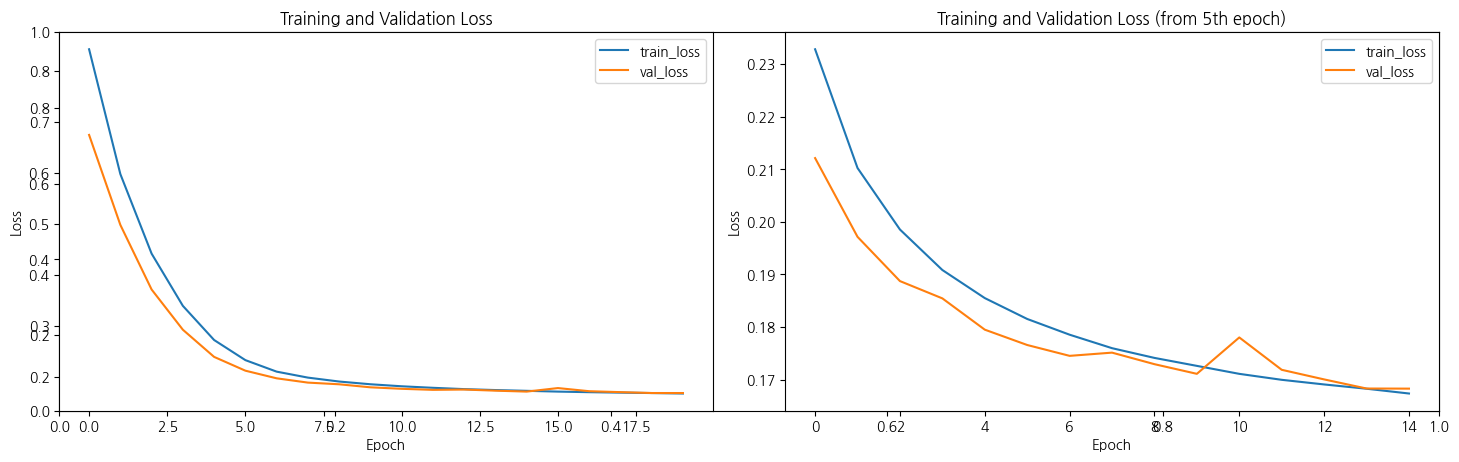

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_lstm_hist.history["loss"], label="train_loss")
ax_1.plot(model_lstm_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_lstm_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_lstm_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# 모델 예측
y_pred = model_rnn.predict(X_test)
y_true = y_test

# 예측값과 실제값의 형태 수정
y_pred_flat = y_pred.reshape(-1)
y_true_flat = y_true.reshape(-1)

# MAE 계산
mae = mean_absolute_error(y_true_flat, y_pred_flat)

# MSE 계산
mse = mean_squared_error(y_true_flat, y_pred_flat)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

69/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Absolute Error: 0.19076095510408642
Mean Squared Error: 0.06034394949587511
Root Mean Squared Error: 0.24565005494783654


## 4.5 CNN

In [ ]:
# cnn
# RobustScaler
input_length = 90
output_length = 90

# 데이터 정규화
scaler = RobustScaler()
df_normalized = scaler.fit_transform(df.iloc[:, 1:])  # '날짜' 컬럼 제외한 모든 컬럼 정규화

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X, y = create_dataset(df_normalized, input_length, output_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=5, activation='tanh', input_shape=(input_length, df_normalized.shape[1])))
model_cnn.add(MaxPooling1D(pool_size=3))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='tanh'))
model_cnn.add(MaxPooling1D(pool_size=3))
model_cnn.add(LSTM(128, activation='tanh'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(64, activation='tanh'))
model_cnn.add(Dense(output_length))

optimizer = Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimizer, loss='mae')

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1
)

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 86, 32)            832       
                                                                 
 max_pooling1d (MaxPooling1  (None, 28, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
# Train the model
model_cnn_hist = model_cnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
279/279 [==============================] - 20s 42ms/step - loss: 0.3936 - val_loss: 0.2479
Epoch 2/100
279/279 [==============================] - 7s 26ms/step - loss: 0.2157 - val_loss: 0.2219
Epoch 3/100
279/279 [==============================] - 6s 22ms/step - loss: 0.1993 - val_loss: 0.2186
Epoch 4/100
279/279 [==============================] - 7s 27ms/step - loss: 0.1910 - val_loss: 0.2137
Epoch 5/100
279/279 [==============================] - 6s 22ms/step - loss: 0.1853 - val_loss: 0.2114
Epoch 6/100
279/279 [==============================] - 7s 26ms/step - loss: 0.1804 - val_loss: 0.2114
Epoch 7/100
279/279 [==============================] - 6s 22ms/step - loss: 0.1766 - val_loss: 0.2166
Epoch 8/100
279/279 [==============================] - 7s 26ms/step - loss: 0.1734 - val_loss: 0.2112
Epoch 9/100
279/279 [==============================] - 6s 22ms/step - loss: 0.1707 - val_loss: 0.2106
Epoch 10/100
279/279 [==============================] - 7s 26ms/step - loss: 0.16

<ipython-input-70-fb1d1c651df2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_1 = plt.subplot(1,2,1)


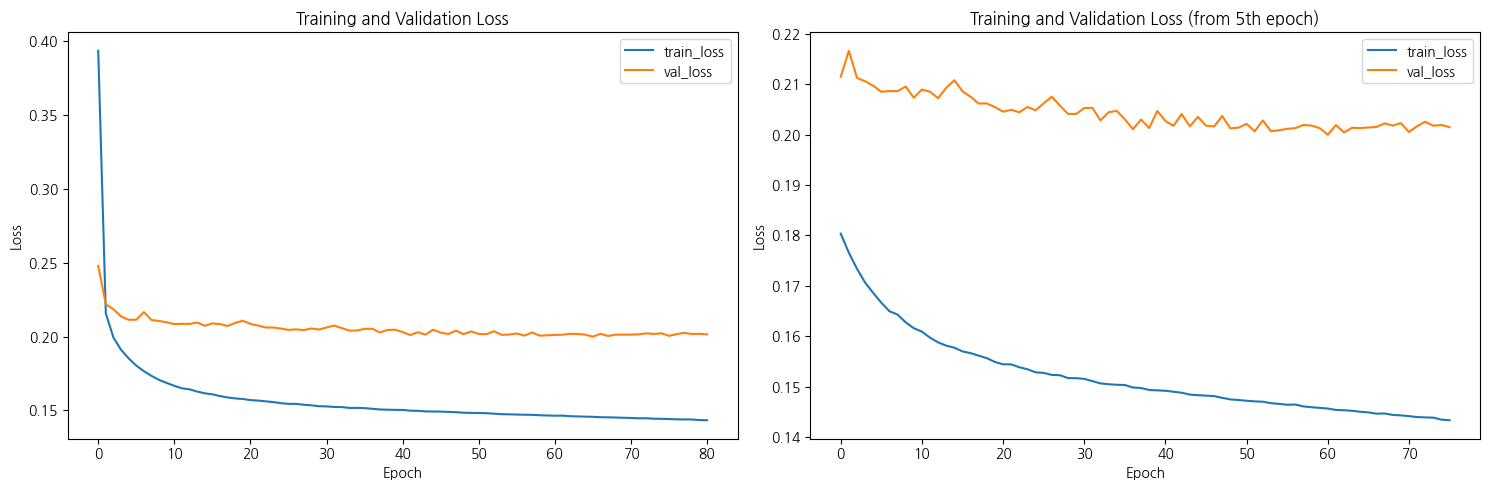

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_cnn_hist.history["loss"], label="train_loss")
ax_1.plot(model_cnn_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_cnn_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_cnn_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# 모델 예측
y_pred = model_cnn.predict(X_test)
y_true = y_test

# 예측값과 실제값의 형태 수정
y_pred_flat = y_pred.reshape(-1)
y_true_flat = y_true.reshape(-1)

# MAE 계산
mae = mean_absolute_error(y_true_flat, y_pred_flat)

# MSE 계산
mse = mean_squared_error(y_true_flat, y_pred_flat)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

70/70 [==============================] - 1s 7ms/step
Mean Absolute Error: 0.20148404134983508
Mean Squared Error: 0.06771679305440416
Root Mean Squared Error: 0.26022450509973916


# 5 실제 예측해보기

In [ ]:
df_target = np.array(df.iloc[:,1]).reshape(-1, 1)

## 5.1 실제 예측을 위해 기존 코드를 수정

In [ ]:
# lstm
# RobustScaler
input_length = 90
output_length = 90

# 데이터 정규화
scaler = RobustScaler()
target_scaler = RobustScaler()
df_normalized = scaler.fit_transform(df.iloc[:, 2:])  # '날짜' 컬럼 제외한 모든 컬럼 정규화
df_target_normalized = target_scaler.fit_transform(df_target)

df_final_normalized = np.hstack((df_target_normalized, df_normalized))

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X, y = create_dataset(df_final_normalized, input_length, output_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(input_length, df_final_normalized.shape[1])))
model.add(Dense(output_length))
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

2024-04-12 13:35:56.338737: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 13:35:56.379991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 13:35:56.380167: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 90)             │         4,590 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,790 (61.68 KB)

 Trainable params: 15,790 (61.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_hist = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


I0000 00:00:1712928962.679615  260379 service.cc:145] XLA service 0x7f6eb40061a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712928962.679670  260379 service.cc:153]   StreamExecutor device (0): NVIDIA A16-16Q, Compute Capability 8.6
2024-04-12 13:36:02.715263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-12 13:36:04.766637: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 19/223 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3506

I0000 00:00:1712928966.067209  260379 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1.9427 - val_loss: 1.0562
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0132 - val_loss: 0.6527
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6316 - val_loss: 0.4911
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4637 - val_loss: 0.3897
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3728 - val_loss: 0.3333
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3307 - val_loss: 0.2934
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2897 - val_loss: 0.2558
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2548 - val_loss: 0.2284
Epoch 9/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2265 - val_loss: 0.2069
Epoch 10/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2083 - val_loss: 0.1947
Epoch 11/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1983 - val_loss: 0.1875
Epoch 12/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/ste

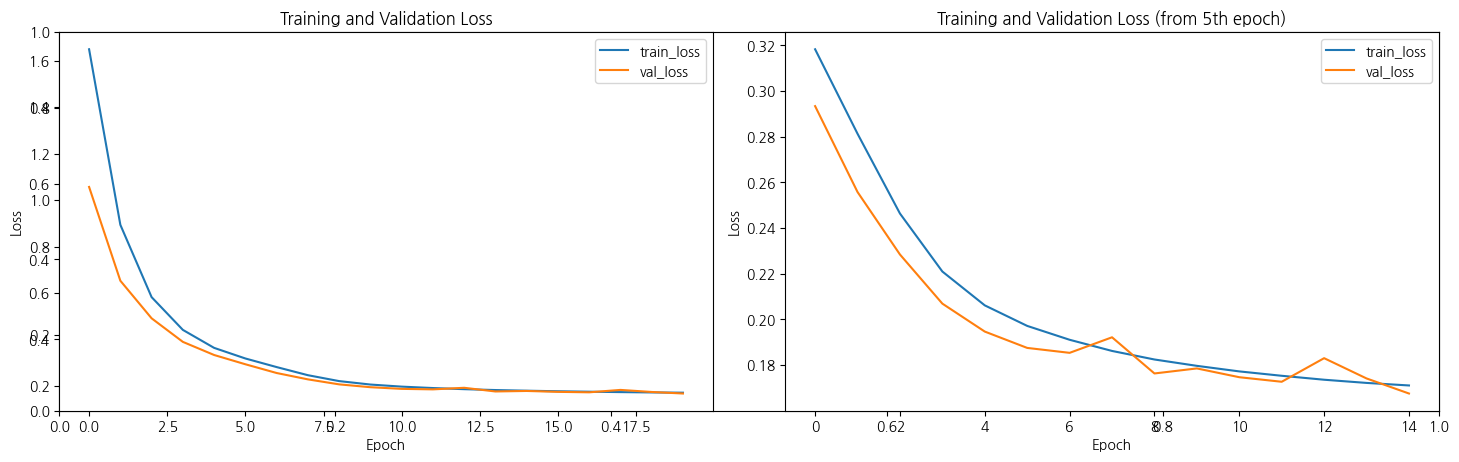

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_hist.history["loss"], label="train_loss")
ax_1.plot(model_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# LSTM
# 모델 예측
y_pred = model.predict(X_test)
y_true = y_test

# 예측값과 실제값의 형태 수정
y_pred_flat = y_pred.reshape(-1)
y_true_flat = y_true.reshape(-1)

# MAE 계산
mae = mean_absolute_error(y_true_flat, y_pred_flat)

# MSE 계산
mse = mean_squared_error(y_true_flat, y_pred_flat)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Error: 0.20896234325919444
Mean Squared Error: 0.07448686769864411
Root Mean Squared Error: 0.27292282370414556


In [ ]:
X_test.shape

(2229, 90, 5)

In [ ]:
df_final_normalized[-90:,:].shape

(90, 5)

In [ ]:
batch = np.expand_dims(df_final_normalized[-90:,:], axis=0)
batch.shape

(1, 90, 5)

In [ ]:
y_pred_2024 = model.predict(batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [ ]:
y_pred_2024

array([[-0.80352753, -0.8258203 , -0.8197557 , -0.845781  , -0.86034614,
        -0.8782455 , -0.8336966 , -0.8616949 , -0.81077564, -0.827574  ,
        -0.8423653 , -0.8871895 , -0.8170796 , -0.7876613 , -0.8484552 ,
        -0.8460857 , -0.8700168 , -0.90457046, -0.7965306 , -0.8429914 ,
        -0.8258136 , -0.84896165, -0.794359  , -0.82679373, -0.8706352 ,
        -0.8689268 , -0.80553496, -0.81796575, -0.7896942 , -0.7567799 ,
        -0.7280916 , -0.78413934, -0.8961554 , -0.7977273 , -0.7736708 ,
        -0.7954163 , -0.8193751 , -0.82398397, -0.7823464 , -0.76405984,
        -0.73009765, -0.74930936, -0.7371229 , -0.6985791 , -0.73460704,
        -0.70432746, -0.738827  , -0.71487737, -0.73269904, -0.7691135 ,
        -0.7158577 , -0.68321246, -0.62443024, -0.5565567 , -0.69945353,
        -0.617672  , -0.70238906, -0.6419618 , -0.6300054 , -0.68627346,
        -0.57021457, -0.623925  , -0.5999965 , -0.59046406, -0.5664884 ,
        -0.6185826 , -0.5311277 , -0.5668798 , -0.5

In [ ]:
final_y_pred_2024 = target_scaler.inverse_transform(y_pred_2024.reshape(-1, 1))

In [ ]:
final_y_pred_2024

array([[ 5.4130836],
       [ 5.11659  ],
       [ 5.19725  ],
       [ 4.851112 ],
       [ 4.657396 ],
       [ 4.419335 ],
       [ 5.0118346],
       [ 4.639458 ],
       [ 5.3166842],
       [ 5.093265 ],
       [ 4.896541 ],
       [ 4.3003793],
       [ 5.232841 ],
       [ 5.624104 ],
       [ 4.8155456],
       [ 4.8470597],
       [ 4.5287766],
       [ 4.0692124],
       [ 5.506143 ],
       [ 4.8882146],
       [ 5.1166787],
       [ 4.8088098],
       [ 5.535025 ],
       [ 5.103643 ],
       [ 4.520551 ],
       [ 4.5432734],
       [ 5.3863845],
       [ 5.2210555],
       [ 5.5970674],
       [ 6.0348268],
       [ 6.4163814],
       [ 5.6709466],
       [ 4.181133 ],
       [ 5.490227 ],
       [ 5.8101783],
       [ 5.520963 ],
       [ 5.202311 ],
       [ 5.1410127],
       [ 5.6947923],
       [ 5.938004 ],
       [ 6.3897014],
       [ 6.1341853],
       [ 6.296265 ],
       [ 6.8088984],
       [ 6.3297267],
       [ 6.7324443],
       [ 6.273601 ],
       [ 6.59

## 5.2 실제 90일의 평균 기온 예측

In [ ]:
test_2024 = pd.read_csv("/content/2024 temp.csv", encoding='cp949')
test_2024.iloc[:,1]

0      7.3
1      8.6
2      5.6
3      5.2
4      8.6
      ... 
85     8.8
86    10.1
87    11.8
88    12.9
89    13.7
Name: 평균기온(℃), Length: 90, dtype: float64

In [ ]:
mae2 = mean_absolute_error(test_2024.iloc[:,1], final_y_pred_2024)
mae2

2.345360420015123

In [ ]:
mse2 = mean_squared_error(test_2024.iloc[:,1], final_y_pred_2024)
mse2

10.503438220772033

In [ ]:
rmse2 = np.sqrt(mse2)
rmse2

3.2409008347636976

In [ ]:
testing = test_2024.set_index('날짜')
testing

평균기온(℃)
날짜                 
2024-01-01      7.3
2024-01-02      8.6
2024-01-03      5.6
2024-01-04      5.2
2024-01-05      8.6
...             ...
2024-03-26      8.8
2024-03-27     10.1
2024-03-28     11.8
2024-03-29     12.9
2024-03-30     13.7

[90 rows x 1 columns]

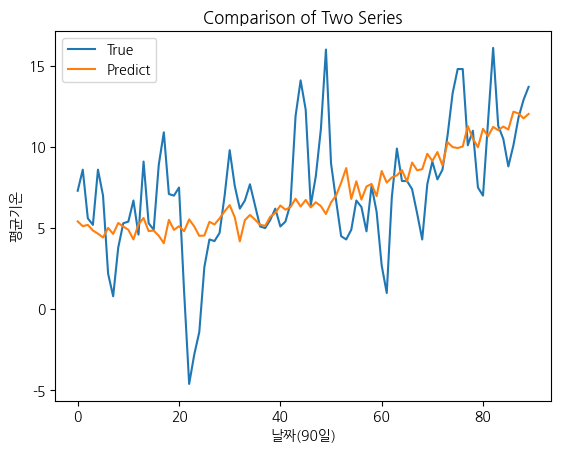

In [ ]:
# 라인 플롯으로 그리기
plt.plot(test_2024.index, test_2024.iloc[:,1], label='True')
plt.plot(test_2024.index, final_y_pred_2024, label='Predict')

# 그래프에 제목과 범례 추가
plt.title('Comparison of Two Series')
plt.xlabel('날짜(90일)')
plt.ylabel('평균기온')
plt.legend()

# 그래프 표시
plt.show()

# 6 최종 결과 보완

In [ ]:
df_target = np.array(df.iloc[:,1]).reshape(-1, 1)

In [ ]:
df_feature = np.array(df.iloc[:,2:])

In [ ]:
# lstm
input_length = 90
output_length = 90

df_stack = np.hstack((df_target, df_feature))

train_size = input_length
train = df_stack[:-train_size]
test = df_stack[-train_size:]

X_test = test[:, :]
y_test = test[:, 0]

def create_dataset(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length, :])  # '날짜' 컬럼 제외한 입력 데이터 생성
        y.append(data[i + input_length:i + input_length + output_length, 0])  # '평균기온' target
    return np.array(X), np.array(y)

# 데이터셋 생성
X_train, y_train = create_dataset(train, input_length, output_length)

In [ ]:
# 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(input_length, df_stack.shape[1])))
model.add(Dense(output_length))
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                11200     
                                                                 
 dense_6 (Dense)             (None, 90)                4590      
                                                                 
Total params: 15790 (61.68 KB)
Trainable params: 15790 (61.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_hist = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
277/277 [==============================] - 17s 54ms/step - loss: 154.8589 - val_loss: 144.8515
Epoch 2/20
277/277 [==============================] - 11s 41ms/step - loss: 114.3897 - val_loss: 110.2131
Epoch 3/20
277/277 [==============================] - 10s 36ms/step - loss: 90.2095 - val_loss: 79.5200
Epoch 4/20
277/277 [==============================] - 12s 44ms/step - loss: 72.8415 - val_loss: 63.5857
Epoch 5/20
277/277 [==============================] - 12s 43ms/step - loss: 59.1360 - val_loss: 60.1639
Epoch 6/20
277/277 [==============================] - 10s 38ms/step - loss: 48.1536 - val_loss: 50.7421
Epoch 7/20
277/277 [==============================] - 11s 40ms/step - loss: 41.8789 - val_loss: 38.0639
Epoch 8/20
277/277 [==============================] - 12s 45ms/step - loss: 34.6632 - val_loss: 37.7020
Epoch 9/20
277/277 [==============================] - 12s 43ms/step - loss: 32.2629 - val_loss: 30.8662
Epoch 10/20
277/277 [==============================] - 10s 3

<ipython-input-107-db94d522b455>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_1 = plt.subplot(1,2,1)


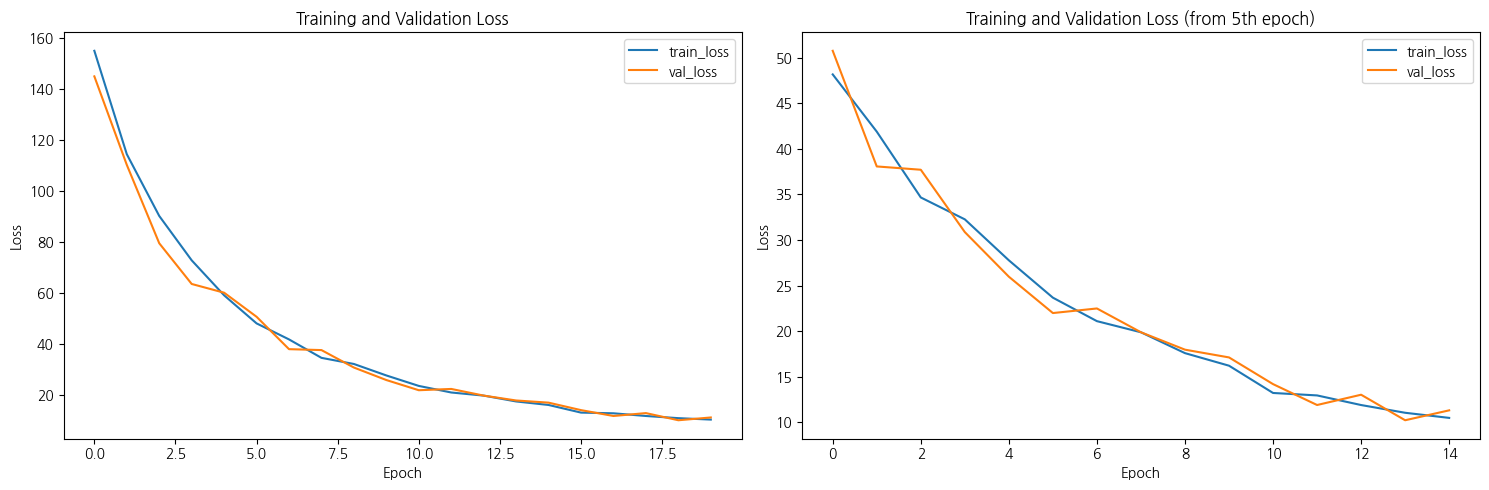

In [ ]:
plt.subplots(figsize=(15,5))

# 첫 번째 subplot
ax_1 = plt.subplot(1,2,1)
ax_1.plot(model_hist.history["loss"], label="train_loss")
ax_1.plot(model_hist.history["val_loss"], label="val_loss")
ax_1.set_xlabel("Epoch")
ax_1.set_ylabel("Loss")
ax_1.legend()
ax_1.set_title("Training and Validation Loss")

# 두 번째 subplot
ax_2 = plt.subplot(1,2,2)
ax_2.plot(model_hist.history["loss"][5:], label="train_loss")
ax_2.plot(model_hist.history["val_loss"][5:], label="val_loss")
ax_2.set_xlabel("Epoch")
ax_2.set_ylabel("Loss")
ax_2.legend()
ax_2.set_title("Training and Validation Loss (from 5th epoch)")

plt.tight_layout()
plt.show()

In [ ]:
# LSTM
# 모델 예측
test_batch = np.expand_dims(X_test, axis=0)
y_pred = model.predict(test_batch)
y_pred = y_pred.reshape(-1, 1)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

1/1 [==============================] - 0s 168ms/step
Mean Absolute Error: 7.132671585612827
Mean Squared Error: 70.52726494509135
Root Mean Squared Error: 8.398051258779702


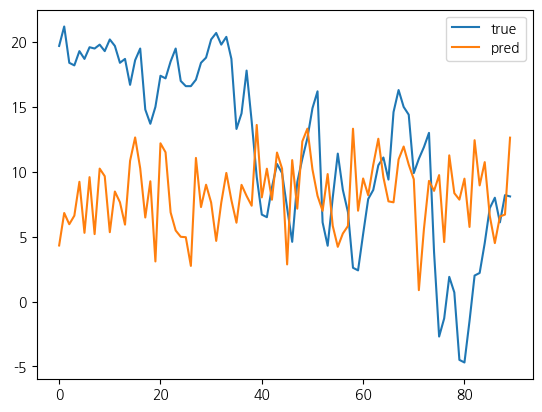

In [ ]:
# 예측값 시각화
plt.plot(y_test, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

In [ ]:
batch = np.expand_dims(df_stack[-90:,:], axis=0)
batch.shape

(1, 90, 5)

# 6.2 미래 90일 예측

In [ ]:
y_pred_2024 = model.predict(batch)

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_pred_2024

array([[ 4.3194594,  6.821935 ,  5.9571996,  6.6166677,  9.227175 ,
         5.293238 ,  9.586355 ,  5.1947894, 10.245225 ,  9.658036 ,
         5.3425097,  8.478165 ,  7.650404 ,  5.927749 , 10.842966 ,
        12.647139 , 10.2654   ,  6.475582 ,  9.267285 ,  3.0875907,
        12.195219 , 11.50147  ,  6.869365 ,  5.474805 ,  4.9884624,
         4.9562483,  2.7449825, 11.067872 ,  7.281578 ,  9.001426 ,
         7.6276393,  4.672447 ,  7.6209164,  9.912361 ,  7.8102098,
         6.0728493,  8.992182 ,  8.136008 ,  7.383925 , 13.610624 ,
         8.027972 , 10.236034 ,  7.8461018, 11.482925 , 10.245768 ,
         2.8587368, 10.898661 ,  7.157119 , 12.342291 , 13.325674 ,
        10.180431 ,  8.144703 ,  6.9866185,  9.823775 ,  5.8322163,
         4.2148995,  5.24078  ,  5.818704 , 13.31874  ,  6.9998026,
         9.483482 ,  8.19215  , 10.537387 , 12.54524  ,  9.576973 ,
         7.7201447,  7.645791 , 10.951775 , 11.946339 , 10.5514555,
         9.421863 ,  0.8749573,  5.58135  ,  9.2

In [ ]:
final_y_pred_2024 = y_pred_2024.reshape(-1, 1)

In [ ]:
final_y_pred_2024

array([[ 4.3194594],
       [ 6.821935 ],
       [ 5.9571996],
       [ 6.6166677],
       [ 9.227175 ],
       [ 5.293238 ],
       [ 9.586355 ],
       [ 5.1947894],
       [10.245225 ],
       [ 9.658036 ],
       [ 5.3425097],
       [ 8.478165 ],
       [ 7.650404 ],
       [ 5.927749 ],
       [10.842966 ],
       [12.647139 ],
       [10.2654   ],
       [ 6.475582 ],
       [ 9.267285 ],
       [ 3.0875907],
       [12.195219 ],
       [11.50147  ],
       [ 6.869365 ],
       [ 5.474805 ],
       [ 4.9884624],
       [ 4.9562483],
       [ 2.7449825],
       [11.067872 ],
       [ 7.281578 ],
       [ 9.001426 ],
       [ 7.6276393],
       [ 4.672447 ],
       [ 7.6209164],
       [ 9.912361 ],
       [ 7.8102098],
       [ 6.0728493],
       [ 8.992182 ],
       [ 8.136008 ],
       [ 7.383925 ],
       [13.610624 ],
       [ 8.027972 ],
       [10.236034 ],
       [ 7.8461018],
       [11.482925 ],
       [10.245768 ],
       [ 2.8587368],
       [10.898661 ],
       [ 7.15

## 6.2 실제 90일의 평균 기온 예측

In [ ]:
test_2024 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/busan/2024 temp.csv", encoding='cp949')
test_2024.iloc[:,1]

0      7.3
1      8.6
2      5.6
3      5.2
4      8.6
      ... 
85     8.8
86    10.1
87    11.8
88    12.9
89    13.7
Name: 평균기온(℃), Length: 90, dtype: float64

In [ ]:
mae2 = mean_absolute_error(test_2024.iloc[:,1], final_y_pred_2024)
mae2

3.4642076985041306

In [ ]:
mse2 = mean_squared_error(test_2024.iloc[:,1], final_y_pred_2024)
mse2

18.917648779506358

In [ ]:
rmse2 = np.sqrt(mse2)
rmse2

4.34944235270527

In [ ]:
testing = test_2024.set_index('날짜')
testing

평균기온(℃)
날짜                 
2024-01-01      7.3
2024-01-02      8.6
2024-01-03      5.6
2024-01-04      5.2
2024-01-05      8.6
...             ...
2024-03-26      8.8
2024-03-27     10.1
2024-03-28     11.8
2024-03-29     12.9
2024-03-30     13.7

[90 rows x 1 columns]

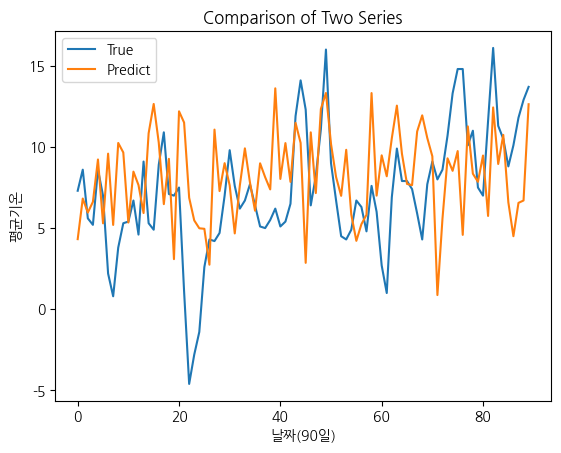

In [ ]:
# 라인 플롯으로 그리기
plt.plot(test_2024.index, test_2024.iloc[:,1], label='True')
plt.plot(test_2024.index, final_y_pred_2024, label='Predict')

# 그래프에 제목과 범례 추가
plt.title('Comparison of Two Series')
plt.xlabel('날짜(90일)')
plt.ylabel('평균기온')
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
model_file_path = '/content/drive/MyDrive/Colab Notebooks/Models/temp_lstm.pkl'

with open(model_file_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {model_file_path}")

Model saved to /content/drive/MyDrive/Colab Notebooks/Models/temp_lstm.pkl
